In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/omarmohamedanwer/brain-and-breast-tumors-segmentation/Dataset/Brain scans/No tumor/Test/no598.jpg
/kaggle/input/d/omarmohamedanwer/brain-and-breast-tumors-segmentation/Dataset/Brain scans/No tumor/Test/no543.jpg
/kaggle/input/d/omarmohamedanwer/brain-and-breast-tumors-segmentation/Dataset/Brain scans/No tumor/Test/no525.jpg
/kaggle/input/d/omarmohamedanwer/brain-and-breast-tumors-segmentation/Dataset/Brain scans/No tumor/Test/no596.jpg
/kaggle/input/d/omarmohamedanwer/brain-and-breast-tumors-segmentation/Dataset/Brain scans/No tumor/Test/no594.jpg
/kaggle/input/d/omarmohamedanwer/brain-and-breast-tumors-segmentation/Dataset/Brain scans/No tumor/Test/no583.jpg
/kaggle/input/d/omarmohamedanwer/brain-and-breast-tumors-segmentation/Dataset/Brain scans/No tumor/Test/no544.jpg
/kaggle/input/d/omarmohamedanwer/brain-and-breast-tumors-segmentation/Dataset/Brain scans/No tumor/Test/no538.jpg
/kaggle/input/d/omarmohamedanwer/brain-and-breast-tumors-segmentation/Dataset/Brain scan

# __Brain Tumor Segmentation :__

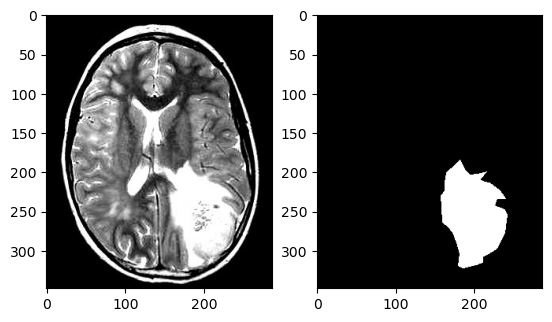

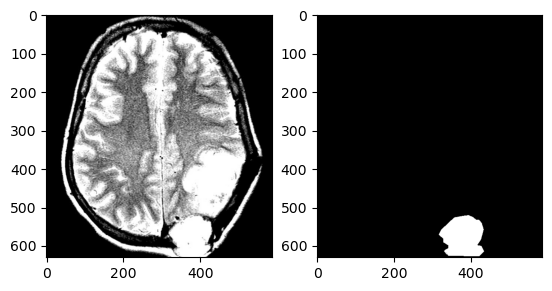

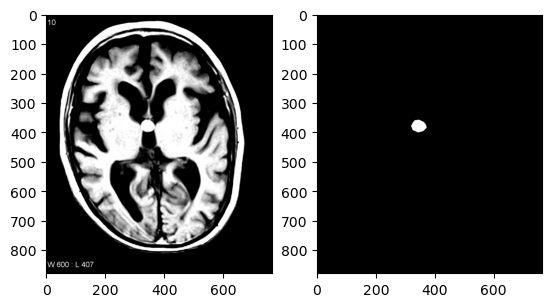

In [3]:
import os
import cv2
import sys
import matplotlib.pyplot as plt 

brain_tumor_path='../input/d/omarmohamedanwer/brain-and-breast-tumors-segmentation/Dataset/Brain scans/Tumor/'

train_imgs = os.listdir(brain_tumor_path + 'TRAIN/')
train_imgs.sort()
train_imgs_paths = [brain_tumor_path + 'TRAIN/' + s for s in train_imgs]

train_masks = os.listdir(brain_tumor_path + 'TRAIN_masks/')
train_masks.sort()
train_masks_paths = [brain_tumor_path + 'TRAIN_masks/' + s for s in train_masks]

test_imgs = os.listdir(brain_tumor_path + 'TEST/')
test_imgs.sort()
test_imgs_paths = [brain_tumor_path + 'TEST/' + s for s in test_imgs]

test_masks = os.listdir(brain_tumor_path + 'TEST_masks/')
test_masks.sort()
test_masks_paths = [brain_tumor_path + 'TEST_masks/' + s for s in test_masks]



for i in range(3):
    img = plt.imread(train_imgs_paths[i])
    mask = plt.imread(train_masks_paths[i])
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(np.rot90(img,2))
    f.add_subplot(1,2, 2)
    plt.imshow(np.rot90(mask,2))
    plt.show(block=True)

In [4]:
from tqdm import tqdm
from skimage.transform import resize
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
print('Getting and resizing training images ... ')
X_train = np.zeros((len(train_imgs_paths), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_imgs_paths), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool_)
        
# Re-sizing our training images to 128 x 128
# Note sys.stdout prints info that can be cleared unlike print.
# Using TQDM allows us to create progress bars
sys.stdout.flush()

for i in tqdm(range(len(train_imgs_paths))):
    img = plt.imread(train_imgs_paths[i])
    if len(img.shape) < 3 : # Some Images have only one channel
        img = cv2.merge((img, img, img))
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[i] = img
    mask = plt.imread(train_masks_paths[i])[:,:,:1]
    mask=resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    Y_train[i] = mask

print('Done')

Getting and resizing training images ... 


100%|██████████| 500/500 [00:17<00:00, 28.84it/s]

Done


In [5]:
from tqdm import tqdm
from skimage.transform import resize
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
print('Getting and resizing training images ... ')
X_test = np.zeros((len(test_imgs_paths), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_test = np.zeros((len(test_imgs_paths), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool_)
        
# Re-sizing our training images to 128 x 128
# Note sys.stdout prints info that can be cleared unlike print.
# Using TQDM allows us to create progress bars
sys.stdout.flush()

for i in tqdm(range(len(test_imgs_paths))):
    img = plt.imread(test_imgs_paths[i])
    if len(img.shape) < 3 : # Some Images have only one channel
        img = cv2.merge((img, img, img))
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[i] = img
    mask = plt.imread(test_masks_paths[i])[:,:,:1]
    mask=resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    Y_test[i] = mask

print('Done')

Getting and resizing training images ... 


100%|██████████| 100/100 [00:03<00:00, 27.14it/s]

Done


In [6]:
X_train.shape , Y_train.shape , X_test.shape  , Y_test.shape 

((500, 128, 128, 3),
 (500, 128, 128, 1),
 (100, 128, 128, 3),
 (100, 128, 128, 1))

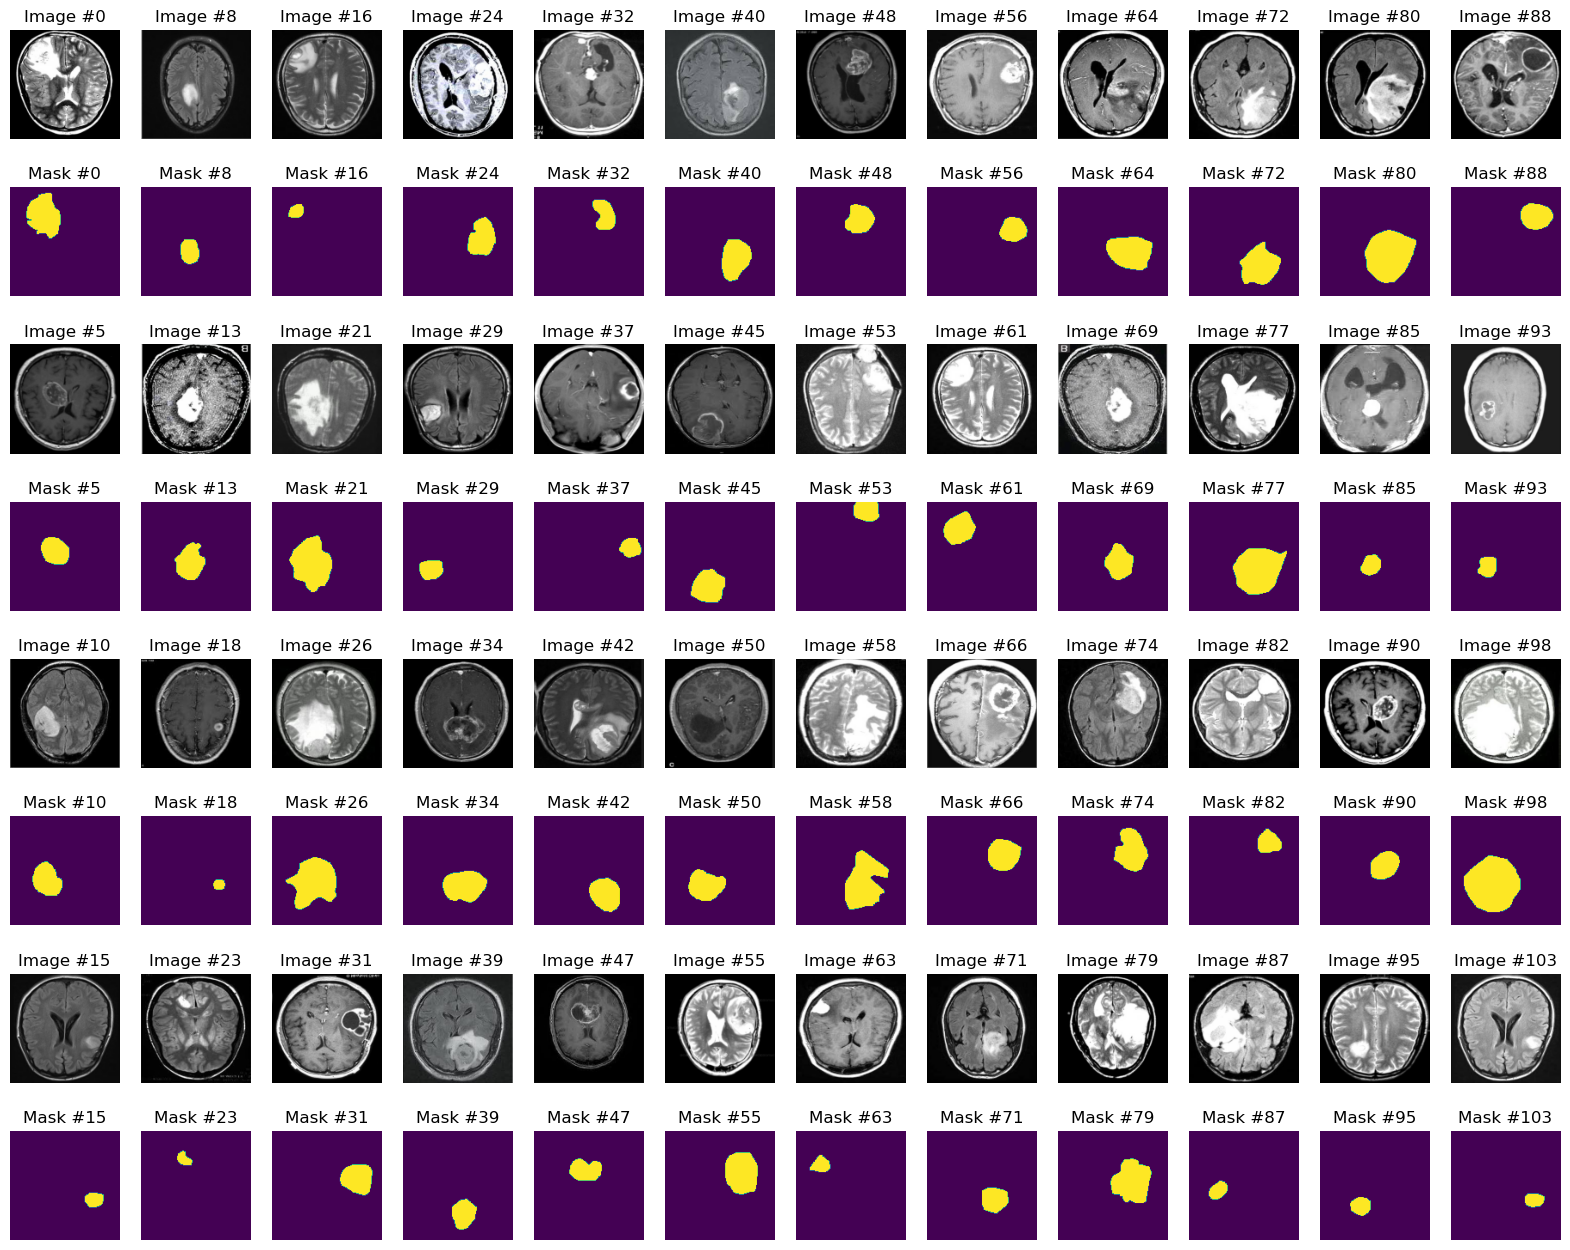

In [7]:
plt.figure(figsize=(20,16))
x, y = 12,4
for i in range(y):  
    for j in range(x):
        plt.subplot(y*2, x, i*2*x+j+1)
        pos = i*5 + j*8
        plt.imshow(X_train[pos])
        plt.title('Image #{}'.format(pos))
        plt.axis('off')
        plt.subplot(y*2, x, (i*2+1)*x+j+1)
        
        #We display the associated mask we just generated above with the training image
        plt.imshow(np.squeeze(Y_train[pos]))
        plt.title('Mask #{}'.format(pos))
        
        plt.axis('off')
        
plt.show()

In [8]:
import sys
import random
import warnings #
import pandas as pd
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.morphology import label
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout, Lambda
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
import tensorflow as tf

In [9]:
# Build U-Net model
# Note we make our layers varaibles so that we can concatenate or stack
# This is required so that we can re-create our U-Net Model

inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

# Note our output is effectively a mask of 128 x 128 
outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

brain_segm_model = Model(inputs=[inputs], outputs=[outputs])
brain_segm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

brain_segm_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

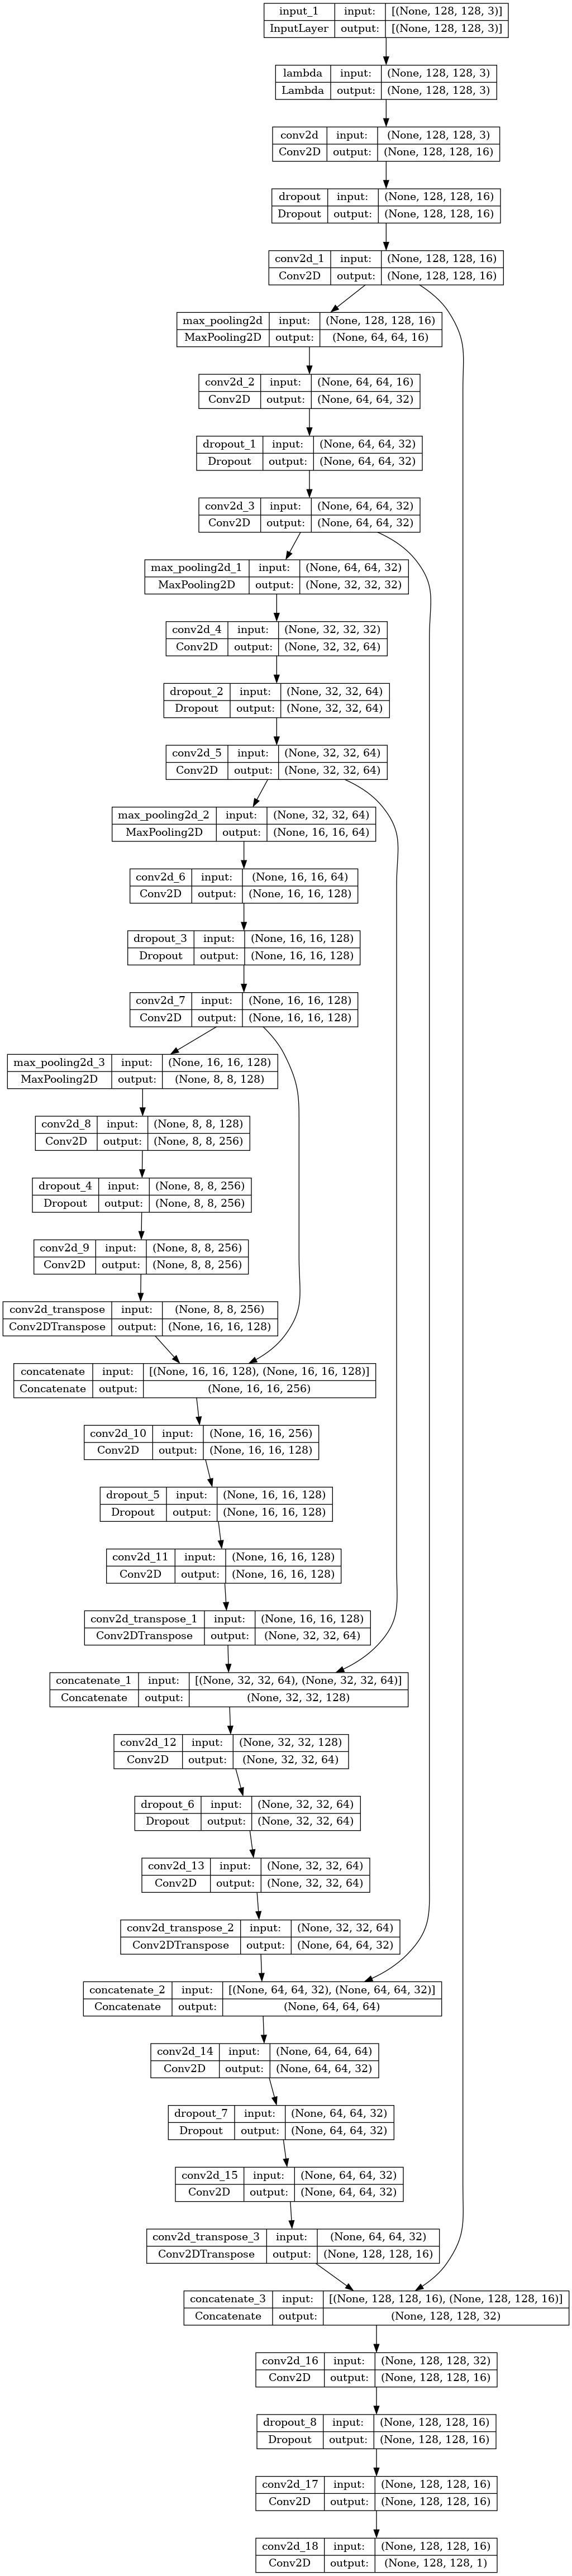

In [10]:
# Plot the model layers
tf.keras.utils.plot_model(brain_segm_model, show_shapes=True)

In [11]:
brain_segm_model.save('brain_segm_model.h5')
model_path = '/kaggle/working/brain_segm_model.h5'

In [12]:
# Initialize our callbacks
checkpoint = ModelCheckpoint(model_path,
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

# Fit our model 
results = brain_segm_model.fit(X_train, Y_train, validation_split=0.1,
                    batch_size=15, epochs=15,callbacks=[earlystop, checkpoint])

Epoch 1/15


2023-04-18 17:42:19.011675: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


29/30 [============================>.] - ETA: 0s - loss: 0.2712 - accuracy: 0.9190
Epoch 1: val_loss improved from inf to 0.30618, saving model to /kaggle/working/brain_segm_model.h5
30/30 [==============================] - 16s 60ms/step - loss: 0.2691 - accuracy: 0.9195 - val_loss: 0.3062 - val_accuracy: 0.9221
Epoch 2/15
29/30 [============================>.] - ETA: 0s - loss: 0.1672 - accuracy: 0.9431
Epoch 2: val_loss improved from 0.30618 to 0.24478, saving model to /kaggle/working/brain_segm_model.h5
30/30 [==============================] - 1s 37ms/step - loss: 0.1668 - accuracy: 0.9433 - val_loss: 0.2448 - val_accuracy: 0.9229
Epoch 3/15
29/30 [============================>.] - ETA: 0s - loss: 0.1612 - accuracy: 0.9466
Epoch 3: val_loss did not improve from 0.24478
30/30 [==============================] - 1s 32ms/step - loss: 0.1630 - accuracy: 0.9450 - val_loss: 0.3062 - val_accuracy: 0.9221
Epoch 4/15
29/30 [============================>.] - ETA: 0s - loss: 0.1485 - accuracy: 

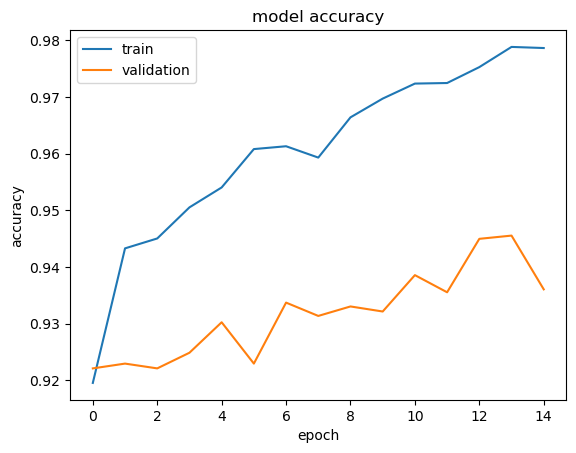

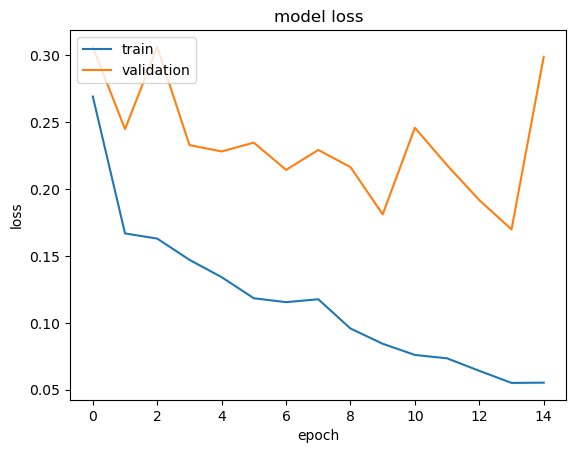

In [13]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Evaluation of the Model

In [14]:
brain_segm_model = load_model('brain_segm_model.h5')

# the first 90% was used for training
preds_train = brain_segm_model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)


#preds_test = model.predict(X_test, verbose=1)

# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)

15/15 [==============================] - 1s 18ms/step


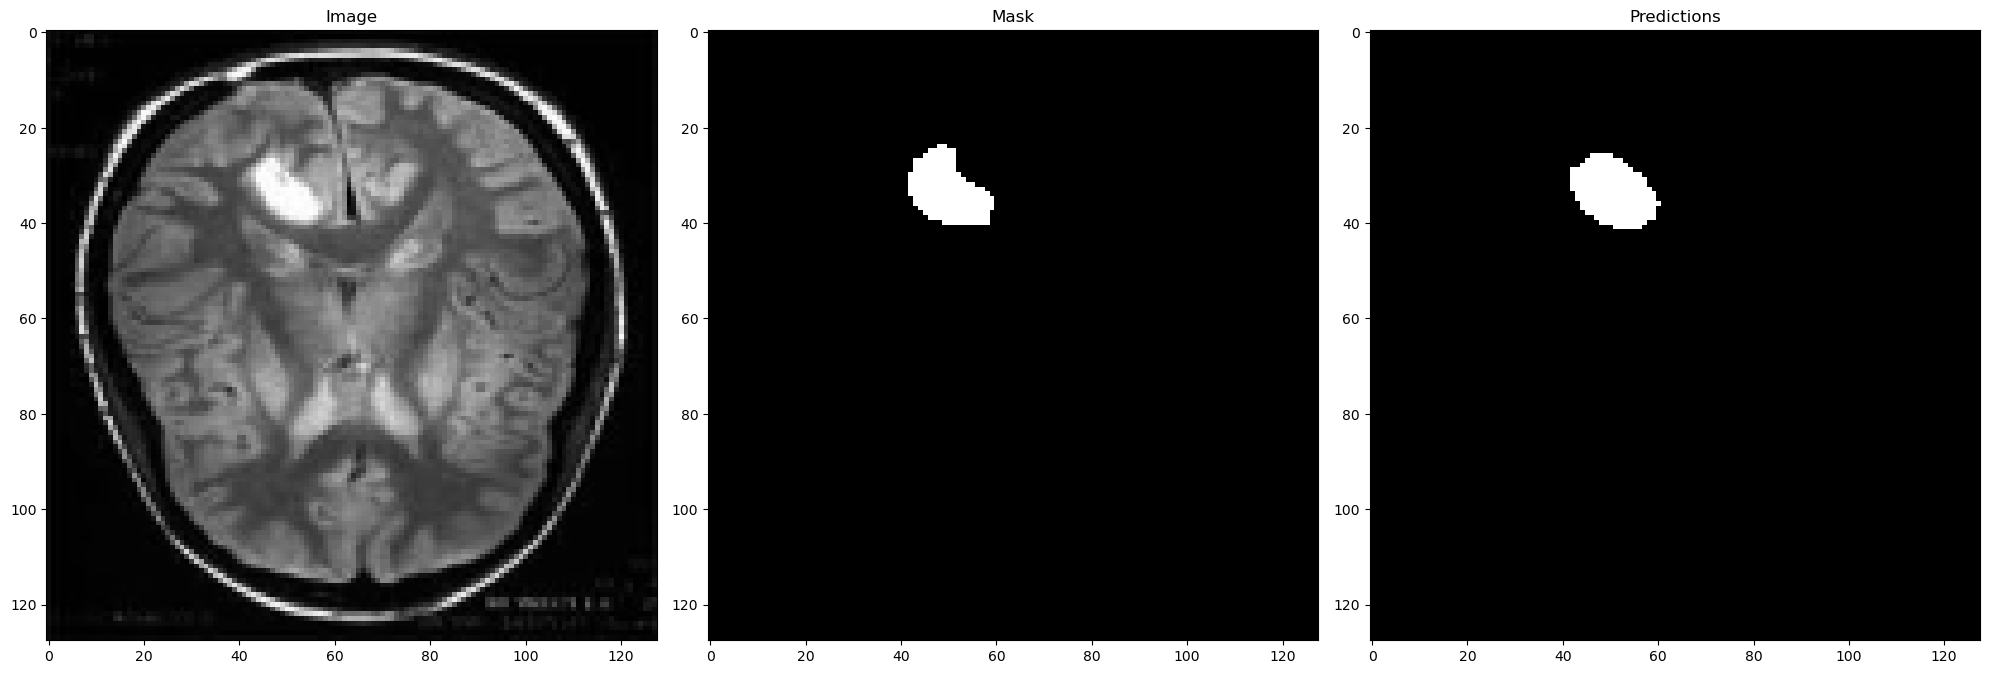

In [15]:
# Ploting our predicted masks
ix = random.randint(0, 120)
plt.figure(figsize=(20,20))

# Our original training image
plt.subplot(131)
imshow(X_train[ix])
plt.title("Image")

# Our original combined mask  
plt.subplot(132)
imshow(np.squeeze(Y_train[ix]))
plt.title("Mask")

# The mask our U-Net model predicts
plt.subplot(133)
imshow(np.squeeze(preds_train_t[ix] > 0.5))
plt.title("Predictions")
plt.show()

# Evaluation of the model on the test data


In [16]:
preds_test = brain_segm_model.predict(X_test, verbose=1)

# Threshold predictions
preds_test_t = (preds_test > 0.5).astype(np.uint8)

4/4 [==============================] - 0s 44ms/step


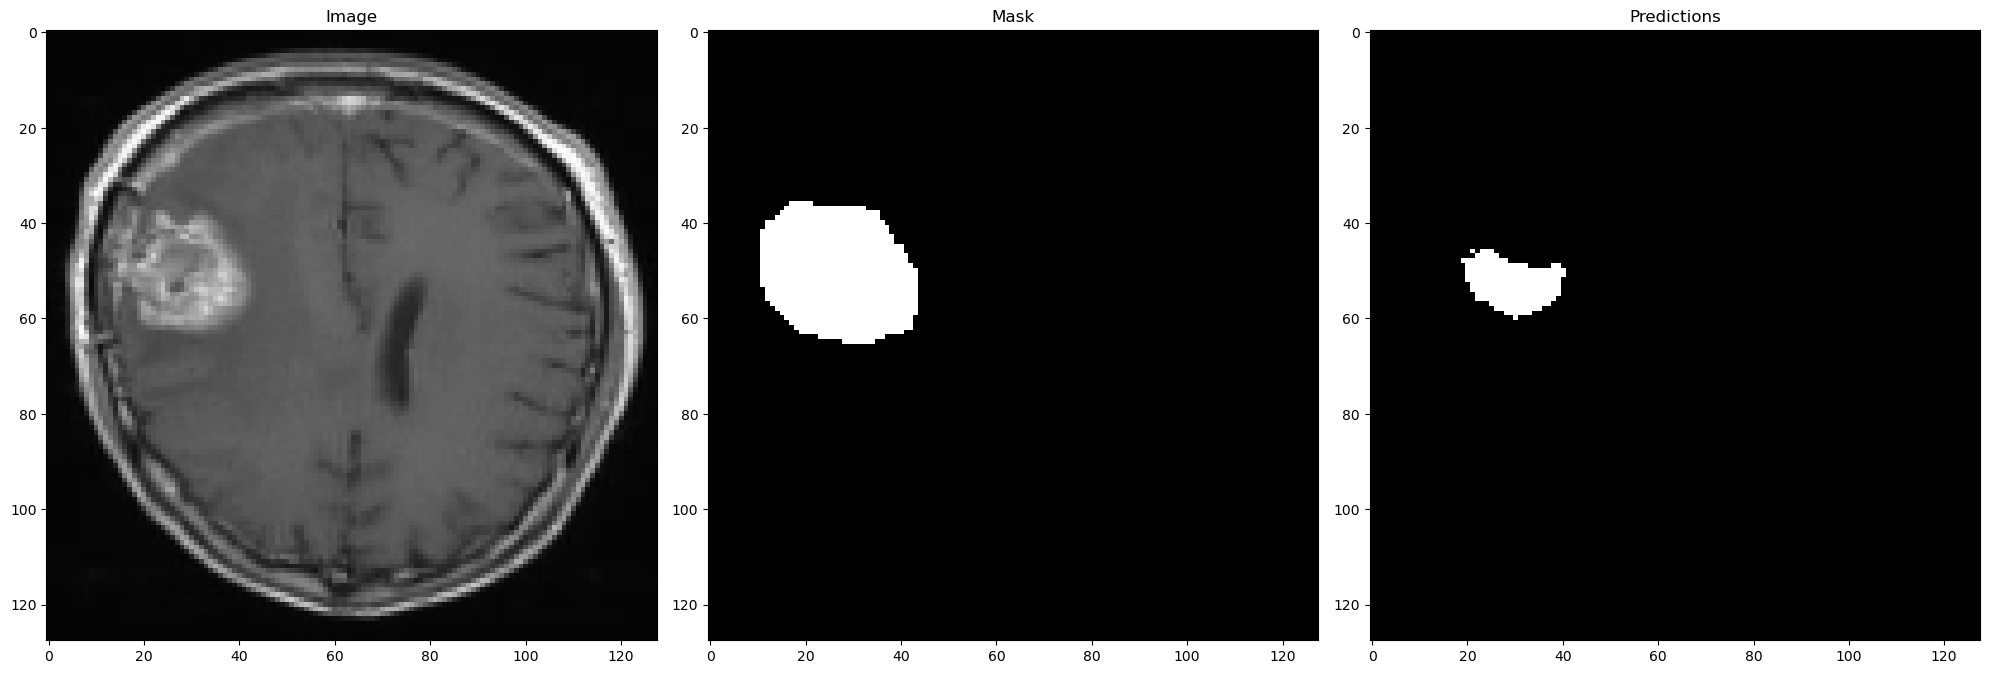

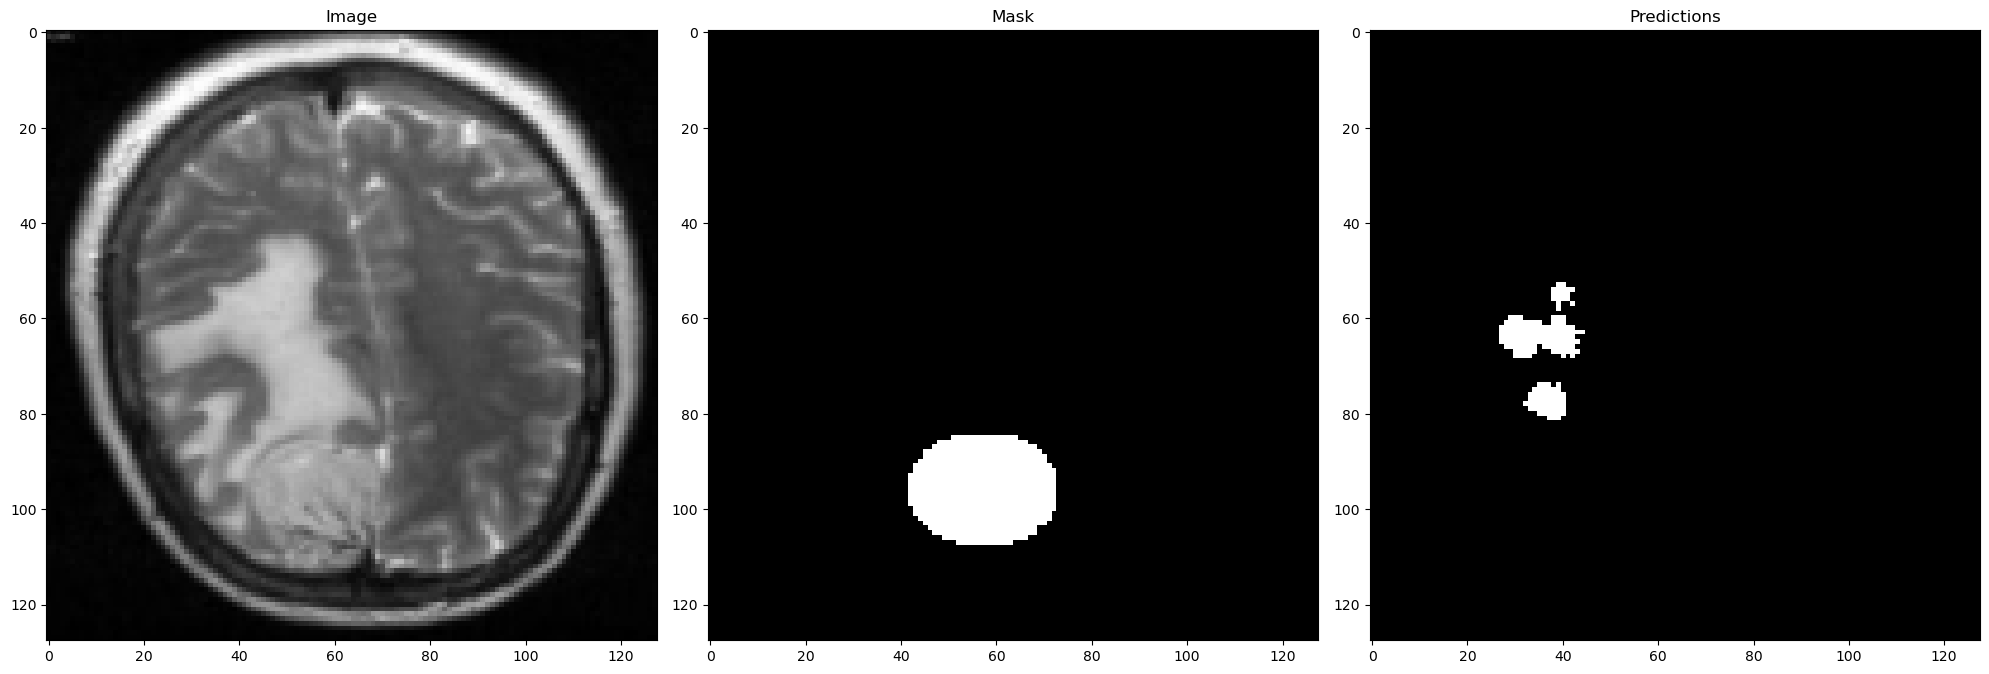

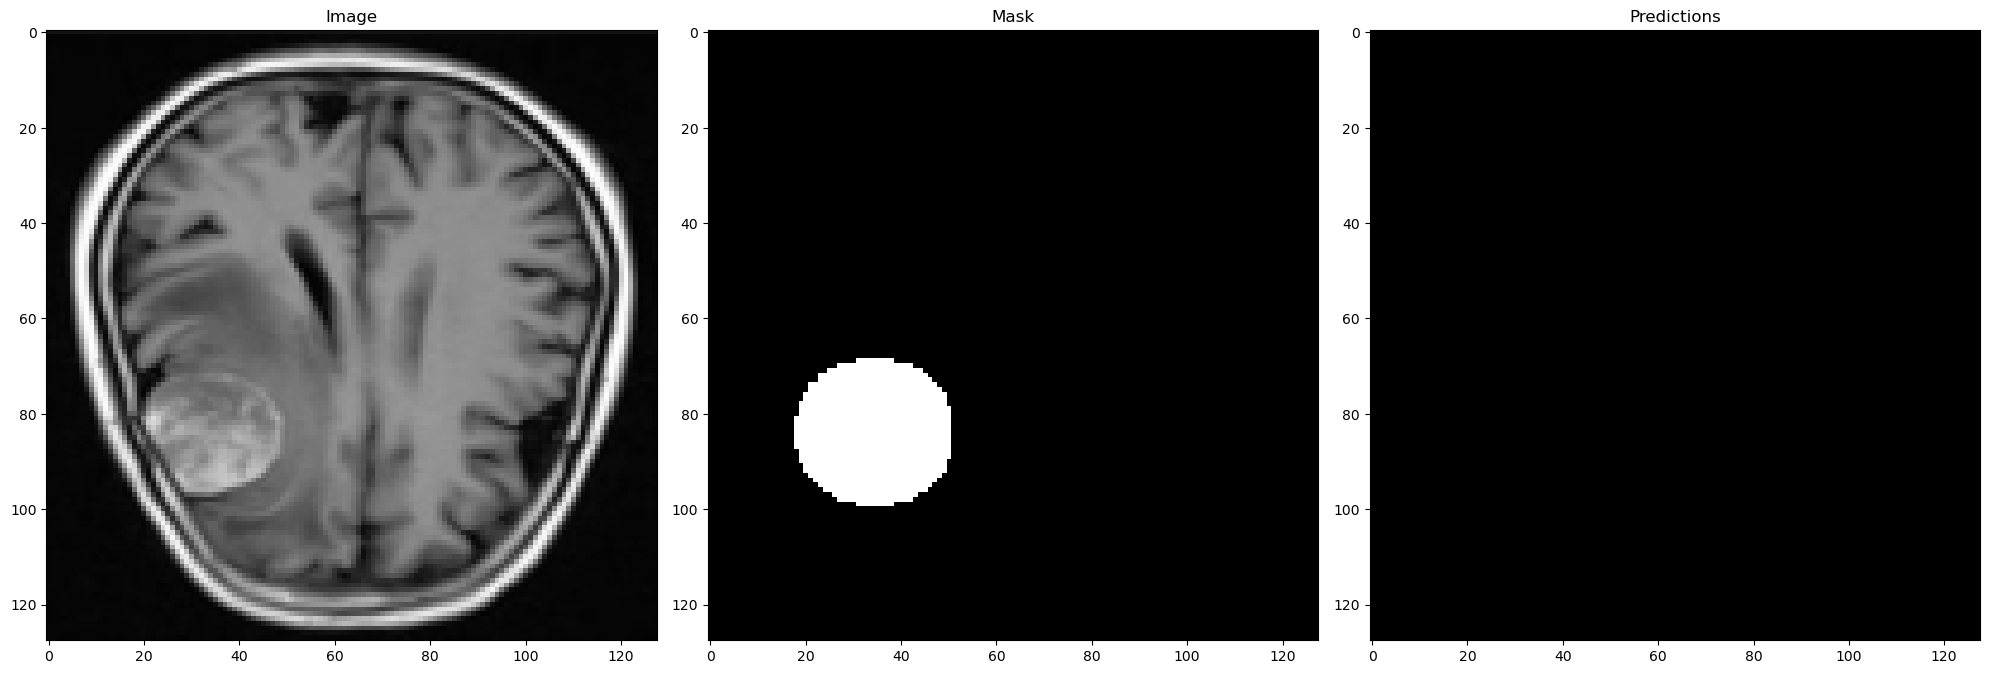

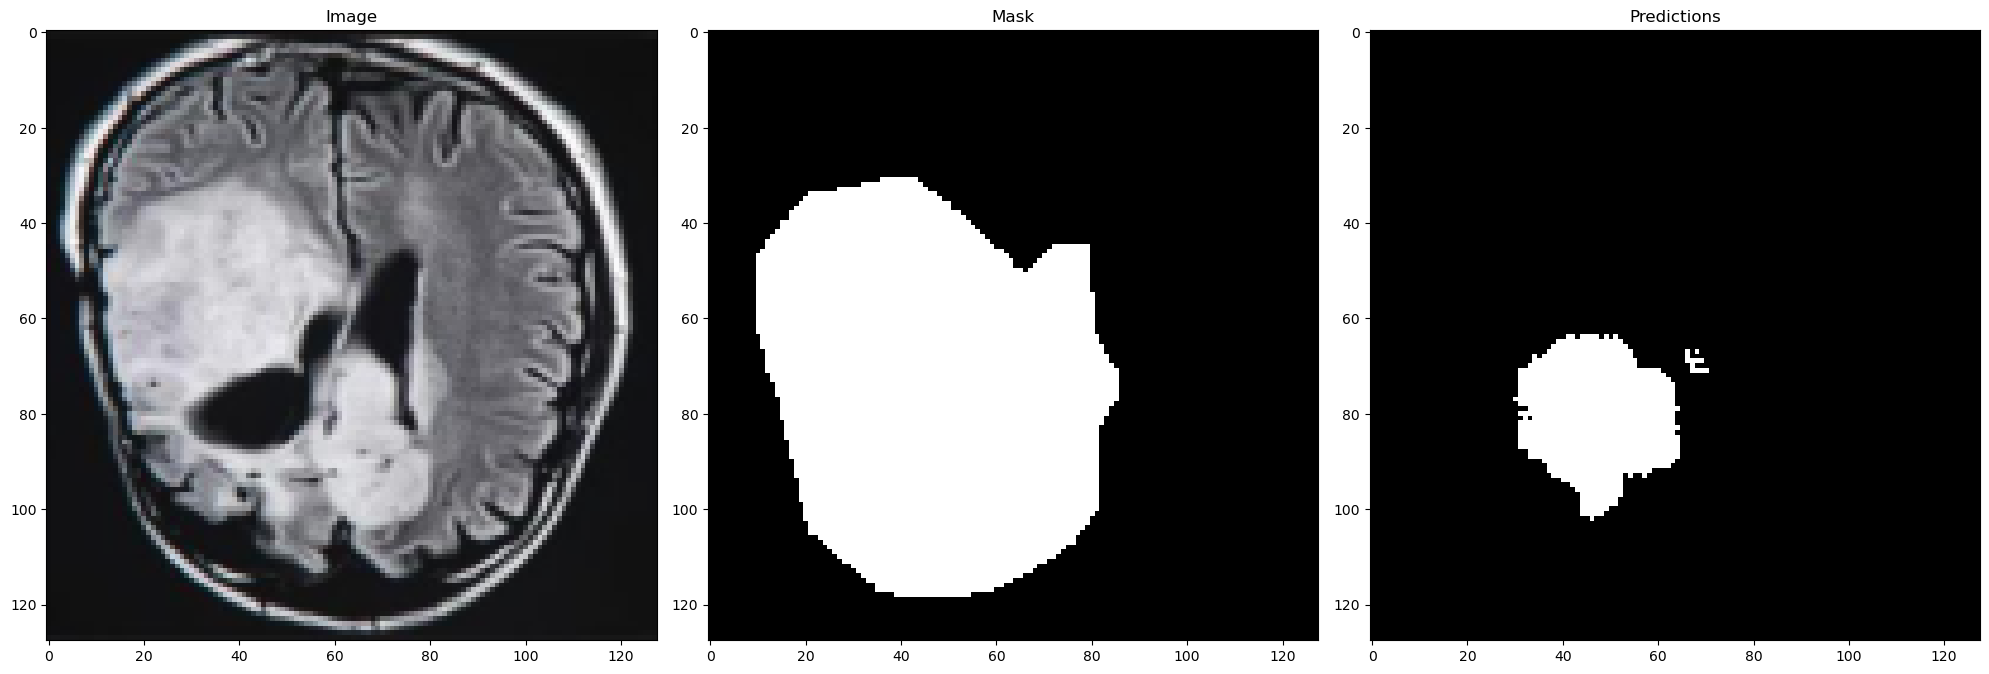

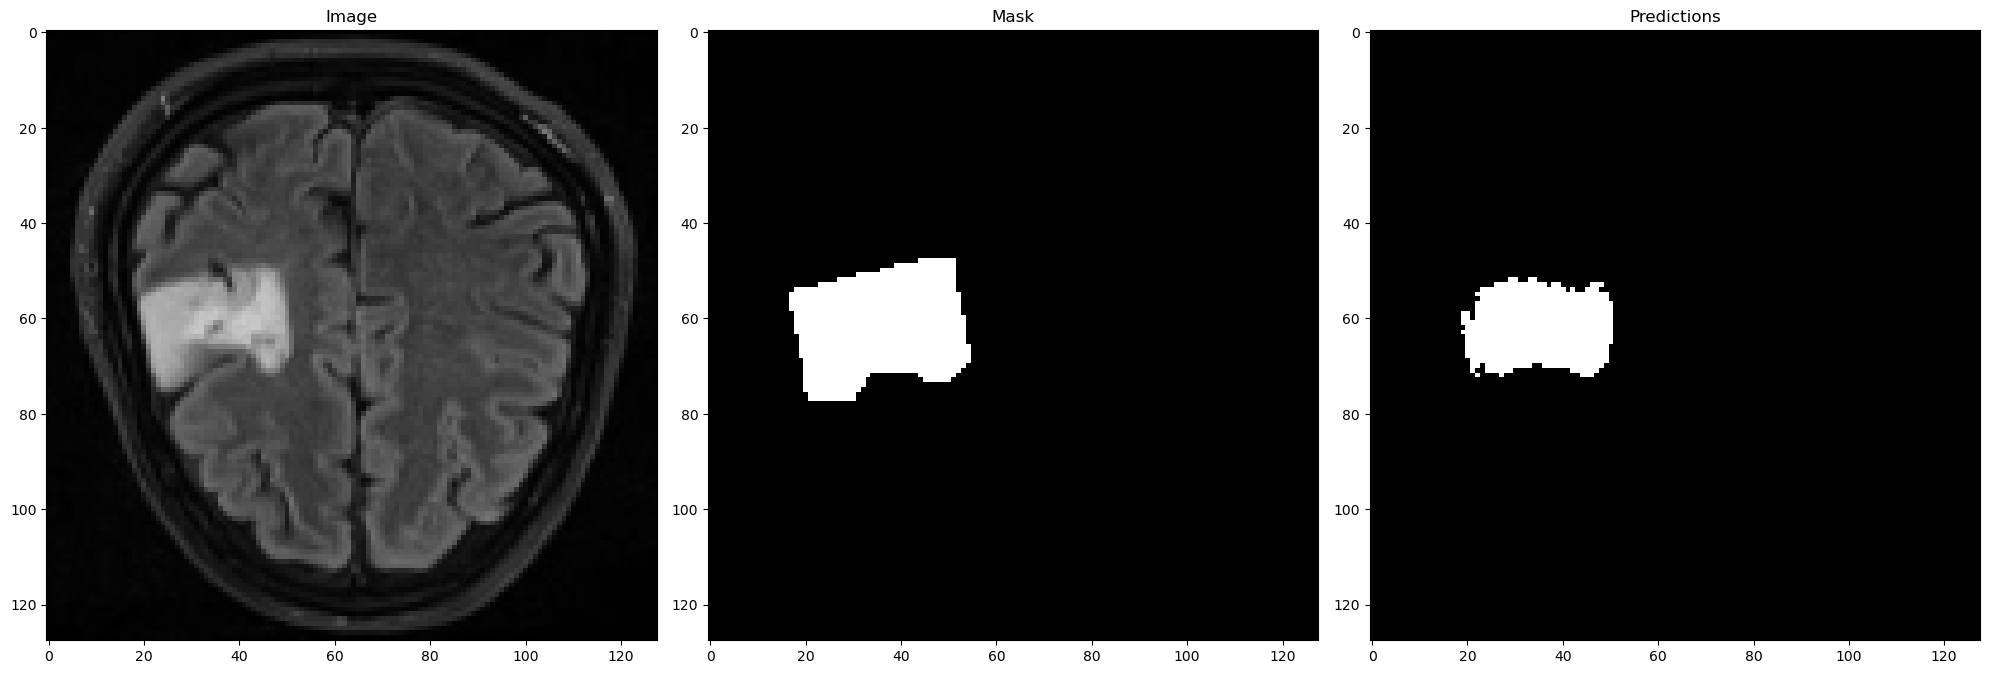

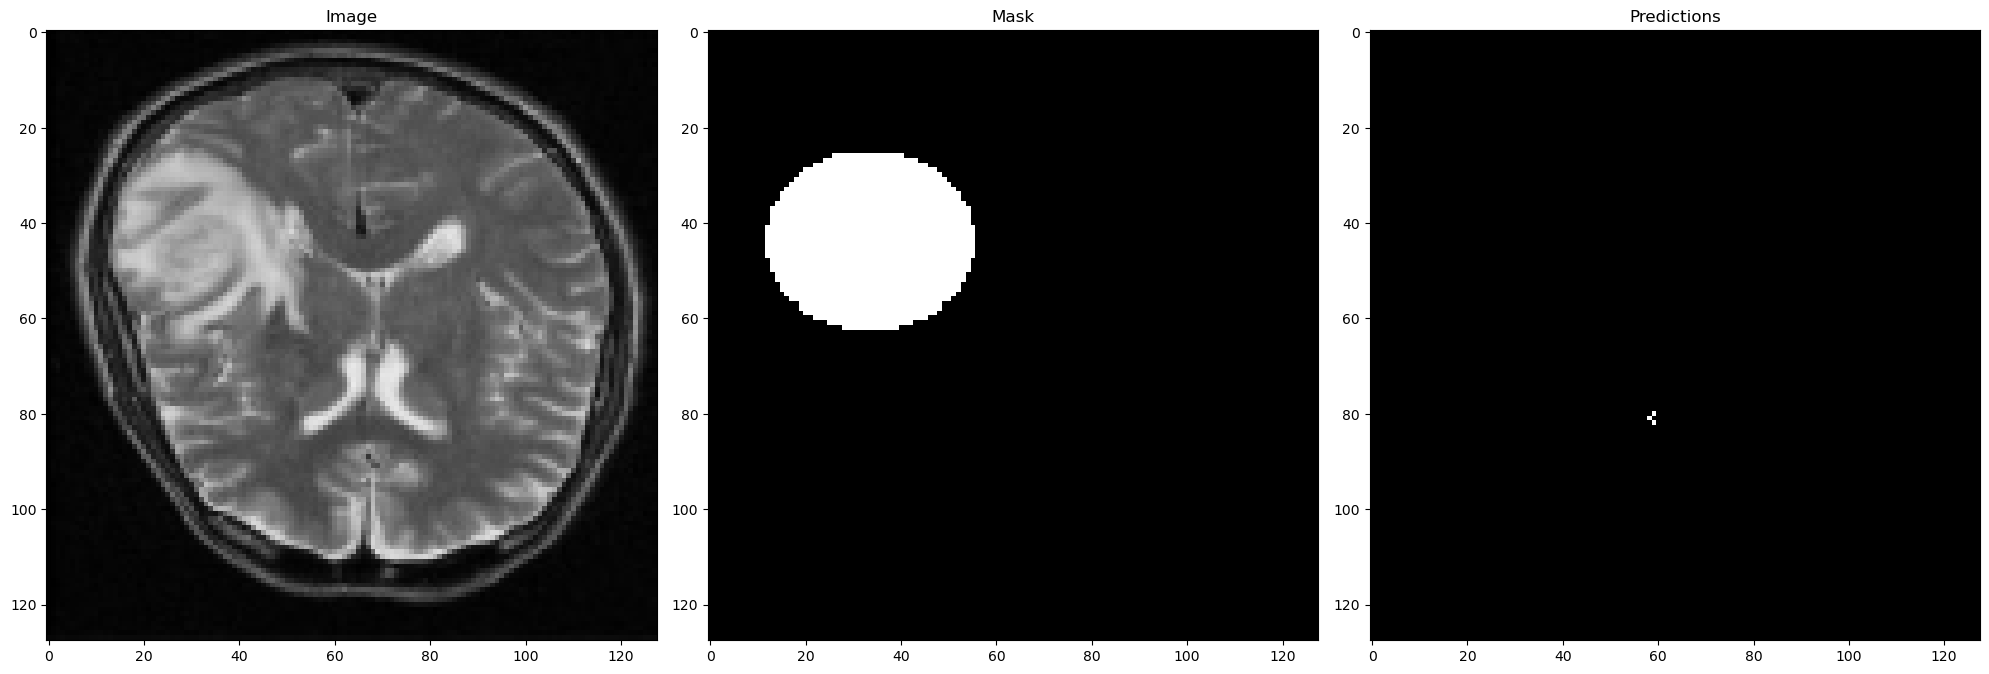

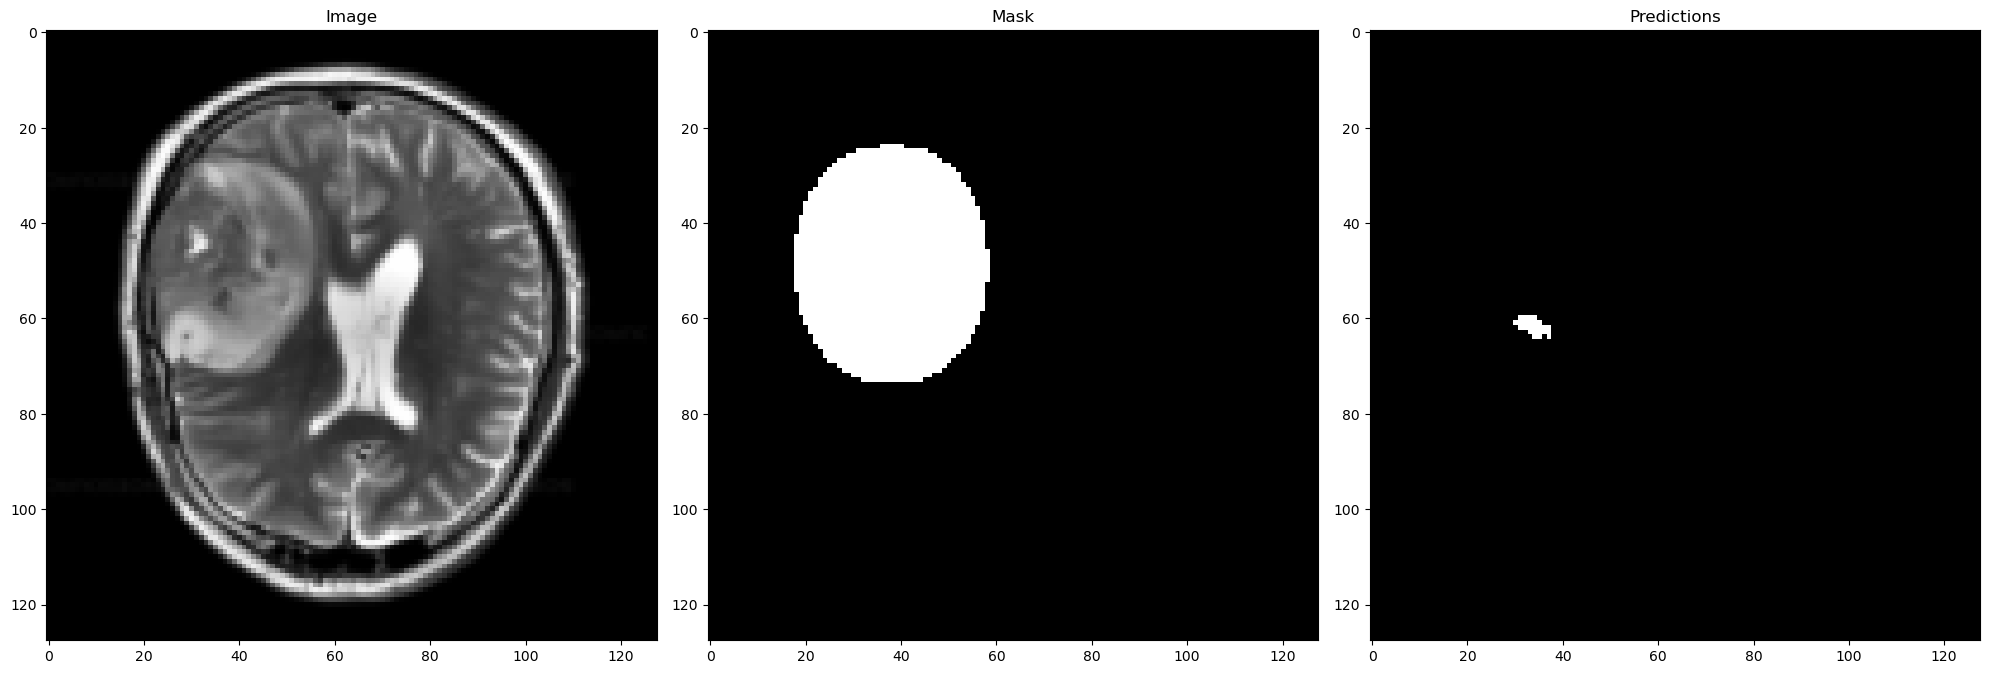

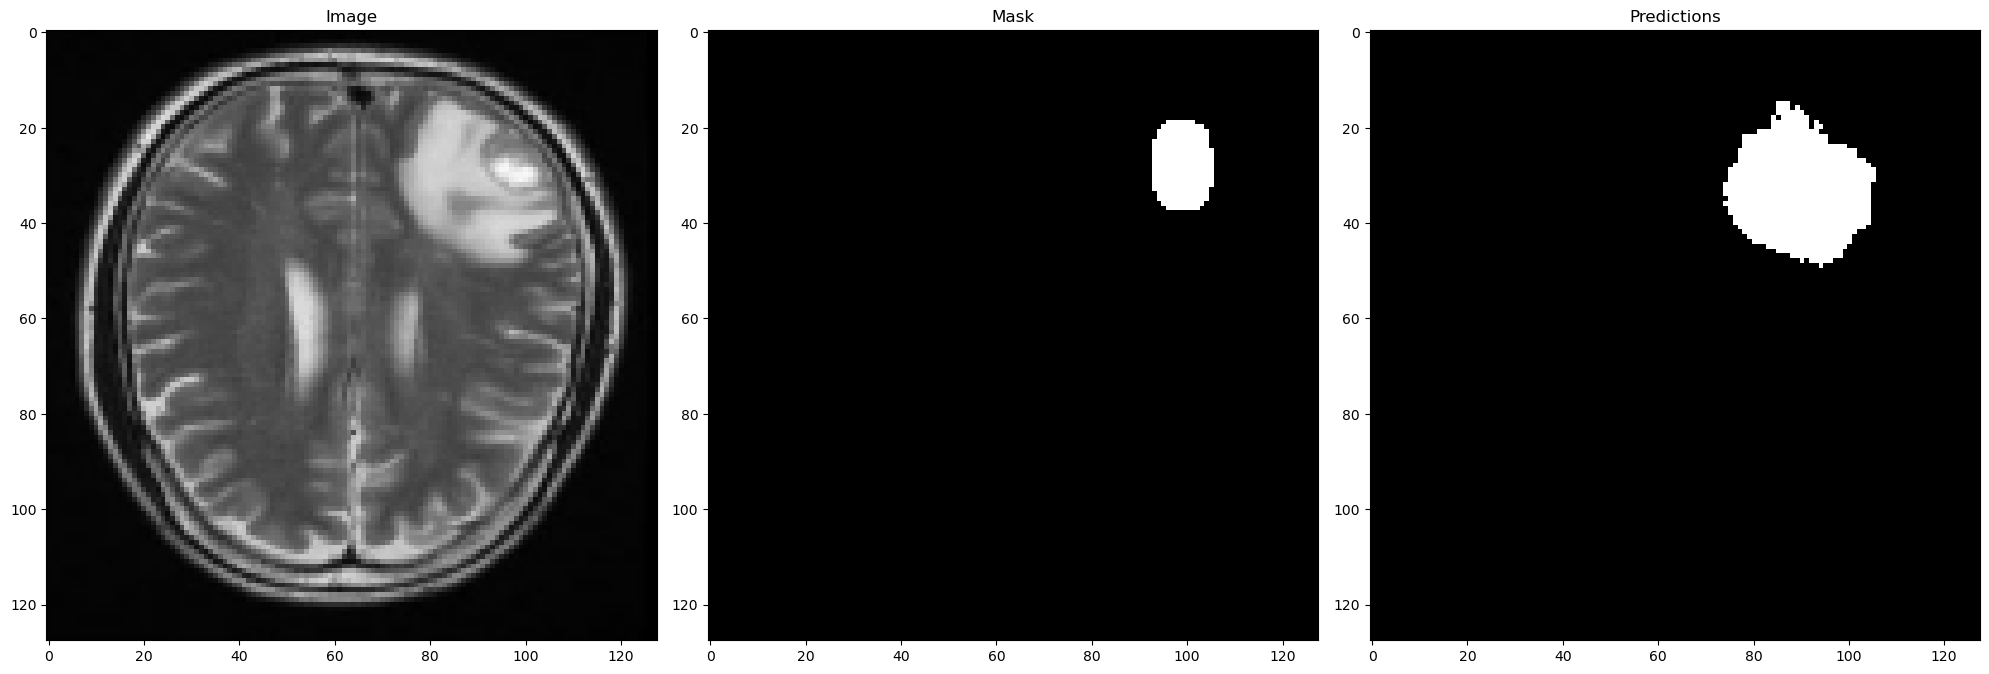

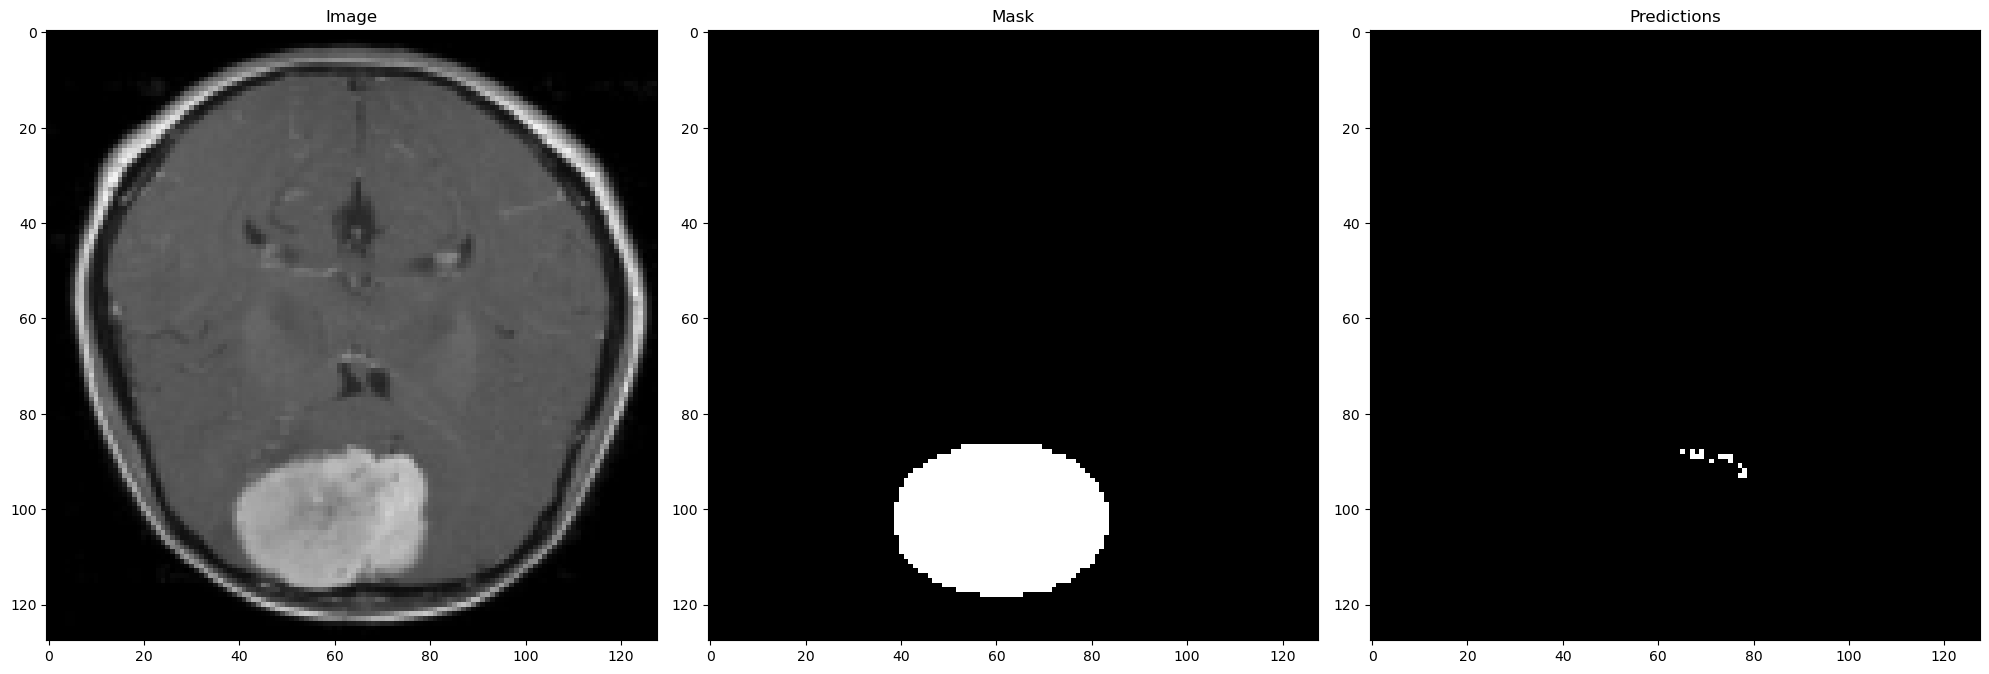

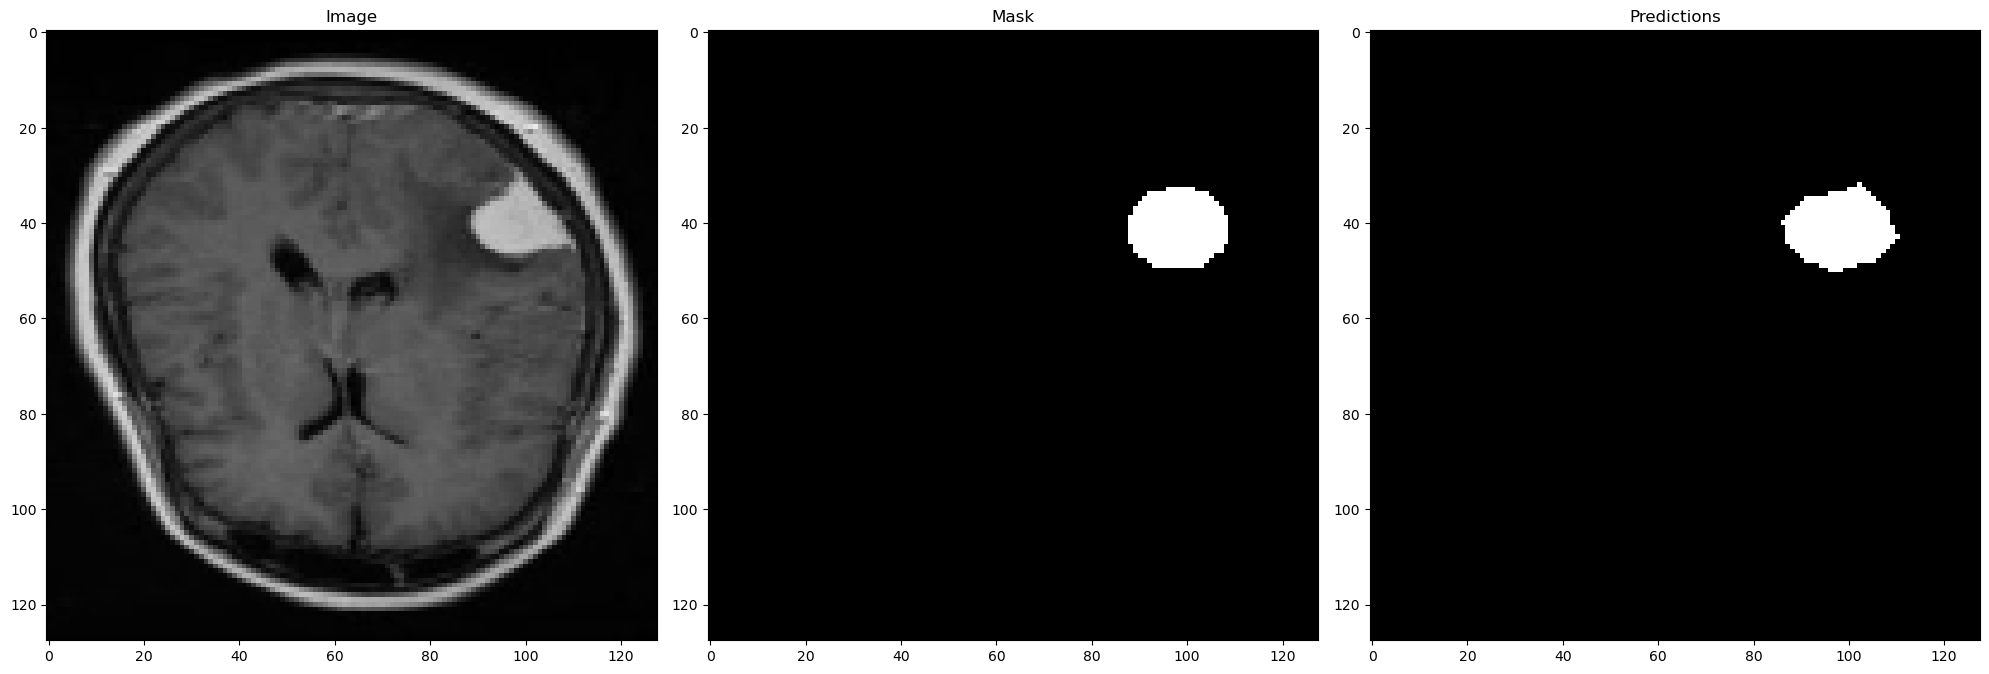

In [17]:
for i in range(10) :
    # Ploting our predicted masks
    plt.figure(figsize=(20,20))

    # Our original training image
    plt.subplot(131)
    imshow(X_test[i])
    plt.title("Image")

    # Our original combined mask  
    plt.subplot(132)
    imshow(np.squeeze(Y_test[i]))
    plt.title("Mask")

    # The mask our U-Net model predicts
    plt.subplot(133)
    imshow(np.squeeze(preds_test_t[i] > 0.5))
    plt.title("Predictions")
    plt.show()

In [18]:
brain_segm_model.save('brain_segm_model.h5')

***
***
***

# Breast Tumor Segmentation

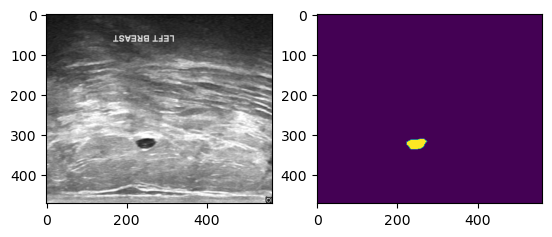

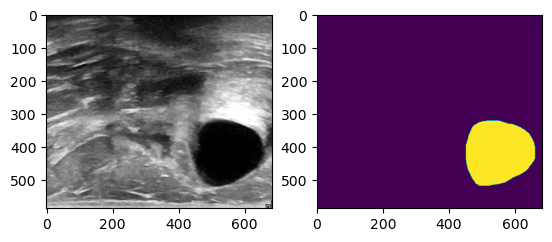

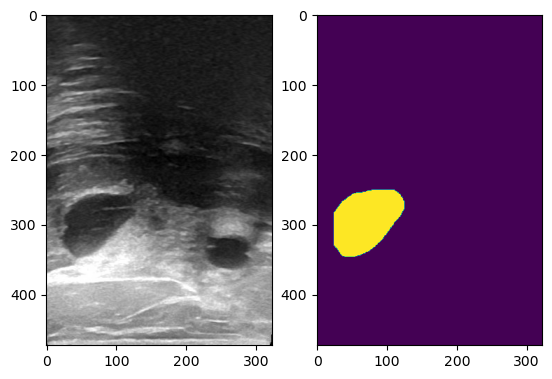

In [19]:
import os
import cv2
import sys
import matplotlib.pyplot as plt 

breast_tumor_path='../input/d/omarmohamedanwer/brain-and-breast-tumors-segmentation/Dataset/Breast scans/'

# Training Data
benign_imgs = os.listdir(breast_tumor_path + 'benign/Train/')

repeated_masks = [s for s in benign_imgs if "mask_" in s]
benign_masks = [breast_tumor_path + 'benign/Train/' + s for s in benign_imgs if s not in repeated_masks and "mask" in s]
benign_imgs = [breast_tumor_path + 'benign/Train/' + s for s in benign_imgs if "mask" not in s]


malignant_imgs = os.listdir(breast_tumor_path + 'malignant/Train/')

malignant_masks = [breast_tumor_path + 'malignant/Train/' + s for s in malignant_imgs if "mask" in s]
malignant_imgs = [breast_tumor_path + 'malignant/Train/' + s for s in malignant_imgs if "mask" not in s]

train_imgs_paths ,  train_masks_paths = [] , []

train_imgs_paths.extend(benign_imgs)
train_imgs_paths.extend(malignant_imgs)
train_imgs_paths.sort()

train_masks_paths.extend(benign_masks)
train_masks_paths.extend(malignant_masks)
train_masks_paths.sort()

# Test Data
benign_imgs = os.listdir(breast_tumor_path + 'benign/Test/')

repeated_masks = [breast_tumor_path + 'benign/Test/'+ s for s in benign_imgs if "mask_" in s]
benign_masks = [breast_tumor_path + 'benign/Test/' + s for s in benign_imgs if "mask" in s and s not in repeated_masks]
benign_imgs = [breast_tumor_path + 'benign/Test/' + s for s in benign_imgs if "mask" not in s]

malignant_imgs = os.listdir(breast_tumor_path + 'malignant/Test/')
malignant_masks = [breast_tumor_path + 'malignant/Test/' + s for s in malignant_imgs if "mask" in s]
malignant_imgs = [breast_tumor_path + 'malignant/Test/' + s for s in malignant_imgs if "mask" not in s]

test_imgs_paths ,  test_masks_paths = [] , []

test_imgs_paths.extend(benign_imgs)
test_imgs_paths.extend(malignant_imgs)
test_imgs_paths.sort()

test_masks_paths.extend(benign_masks)
test_masks_paths.extend(malignant_masks)
test_masks_paths.sort()

for i in range(3):
    img = plt.imread(train_imgs_paths[i])
    mask = plt.imread(train_masks_paths[i])
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(np.rot90(img,2))
    f.add_subplot(1,2, 2)
    plt.imshow(np.rot90(mask,2))
    plt.show(block=True)

In [20]:
def images_array(imgs_paths_list,IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS) :
    
    from tqdm import tqdm
    from skimage.transform import resize
    
    print('Getting and resizing training images ... ')
    X = np.zeros((len(imgs_paths_list), IMG_HEIGHT, IMG_WIDTH , IMG_CHANNELS), dtype=np.uint8)
    # Note sys.stdout prints info that can be cleared unlike print.
    sys.stdout.flush()
    
    # Using TQDM allows us to create progress bars
    for i in tqdm(range(len(imgs_paths_list))):
        img = cv2.imread(imgs_paths_list[i])
        img = resize(img, (IMG_HEIGHT, IMG_WIDTH , IMG_CHANNELS), mode='constant', preserve_range=True , order=2)
        X[i] = img
    print('Done')
    return X

In [21]:
def masks_array(masks_paths_list,IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS) :
    
    from tqdm import tqdm
    from skimage.transform import resize
    
    print('Getting and resizing training images ... ')
    Y = np.zeros((len(masks_paths_list), IMG_HEIGHT, IMG_WIDTH ,1), dtype=np.bool_)
    # Note sys.stdout prints info that can be cleared unlike print.
    sys.stdout.flush()
    
    # Using TQDM allows us to create progress bars
    for i in tqdm(range(len(masks_paths_list))):
        mask = cv2.imread(masks_paths_list[i])
        mask=resize(mask, (IMG_HEIGHT, IMG_WIDTH , 1), mode='constant', preserve_range=True)
        Y[i] = mask

    print('Done')
    return Y

In [22]:
IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS = 128,128,3

In [23]:
X_train = images_array(train_imgs_paths,IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS)
Y_train = masks_array(train_masks_paths,IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS)

Getting and resizing training images ... 


100%|██████████| 577/577 [05:13<00:00,  1.84it/s]

Done
Getting and resizing training images ... 



100%|██████████| 577/577 [00:21<00:00, 26.79it/s]

Done


In [24]:
X_test = images_array(test_imgs_paths,IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS)
Y_test = masks_array(test_masks_paths,IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS)

Getting and resizing training images ... 


100%|██████████| 70/70 [00:39<00:00,  1.76it/s]

Done
Getting and resizing training images ... 



100%|██████████| 71/71 [00:02<00:00, 27.58it/s]

Done


In [25]:
X_train.shape , Y_train.shape , X_test.shape  , Y_test.shape 

((577, 128, 128, 3), (577, 128, 128, 1), (70, 128, 128, 3), (71, 128, 128, 1))

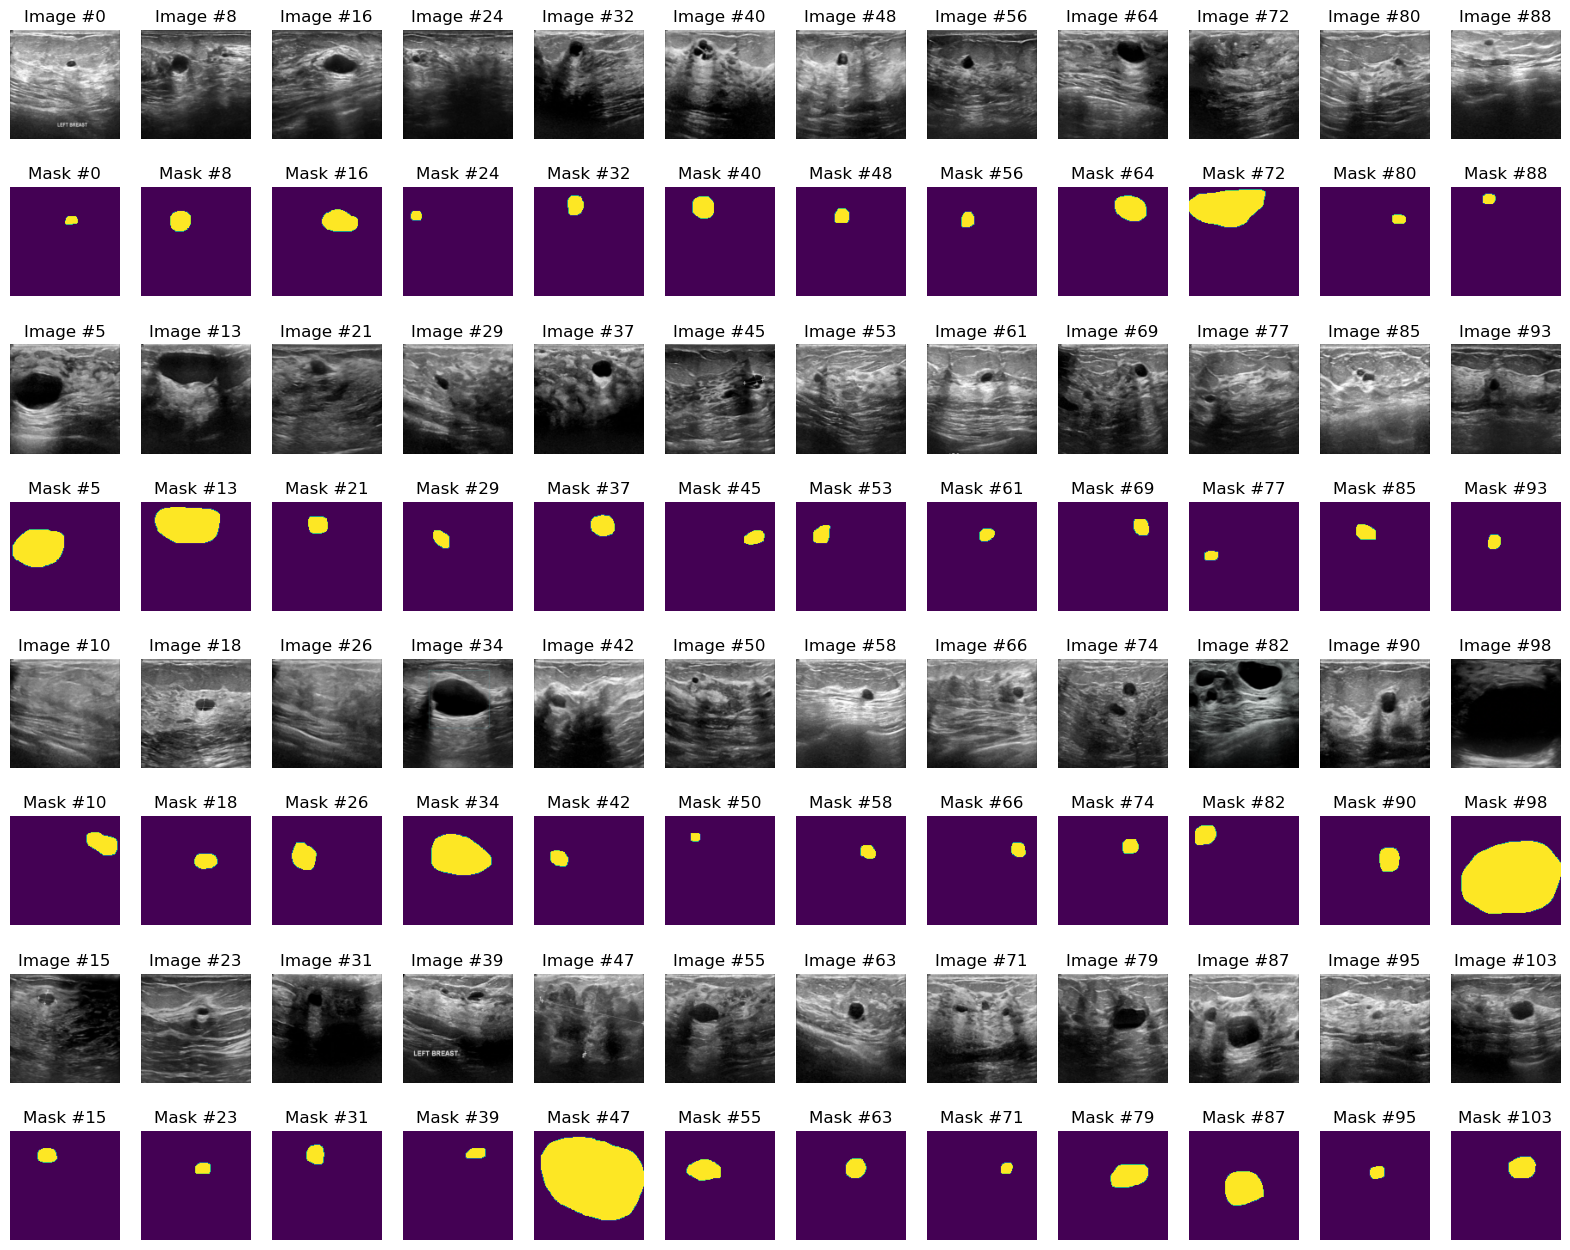

In [26]:
plt.figure(figsize=(20,16))
x, y = 12,4
for i in range(y):  
    for j in range(x):
        plt.subplot(y*2, x, i*2*x+j+1)
        pos = i*5 + j*8
        plt.imshow(X_train[pos])
        plt.title('Image #{}'.format(pos))
        plt.axis('off')
        plt.subplot(y*2, x, (i*2+1)*x+j+1)
        
        #We display the associated mask we just generated above with the training image
        plt.imshow(np.squeeze(Y_train[pos]))
        plt.title('Mask #{}'.format(pos))
        
        plt.axis('off')
        
plt.show()

In [27]:
# Build U-Net model
# Note we make our layers varaibles so that we can concatenate or stack
# This is required so that we can re-create our U-Net Model

inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

# Note our output is effectively a mask of 128 x 128 
outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

breast_segm_model = Model(inputs=[inputs], outputs=[outputs])
breast_segm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

breast_segm_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_1 (Lambda)              (None, 128, 128, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 128, 128, 16  448         ['lambda_1[0][0]']               
                                )                                                                 
                                                                                            

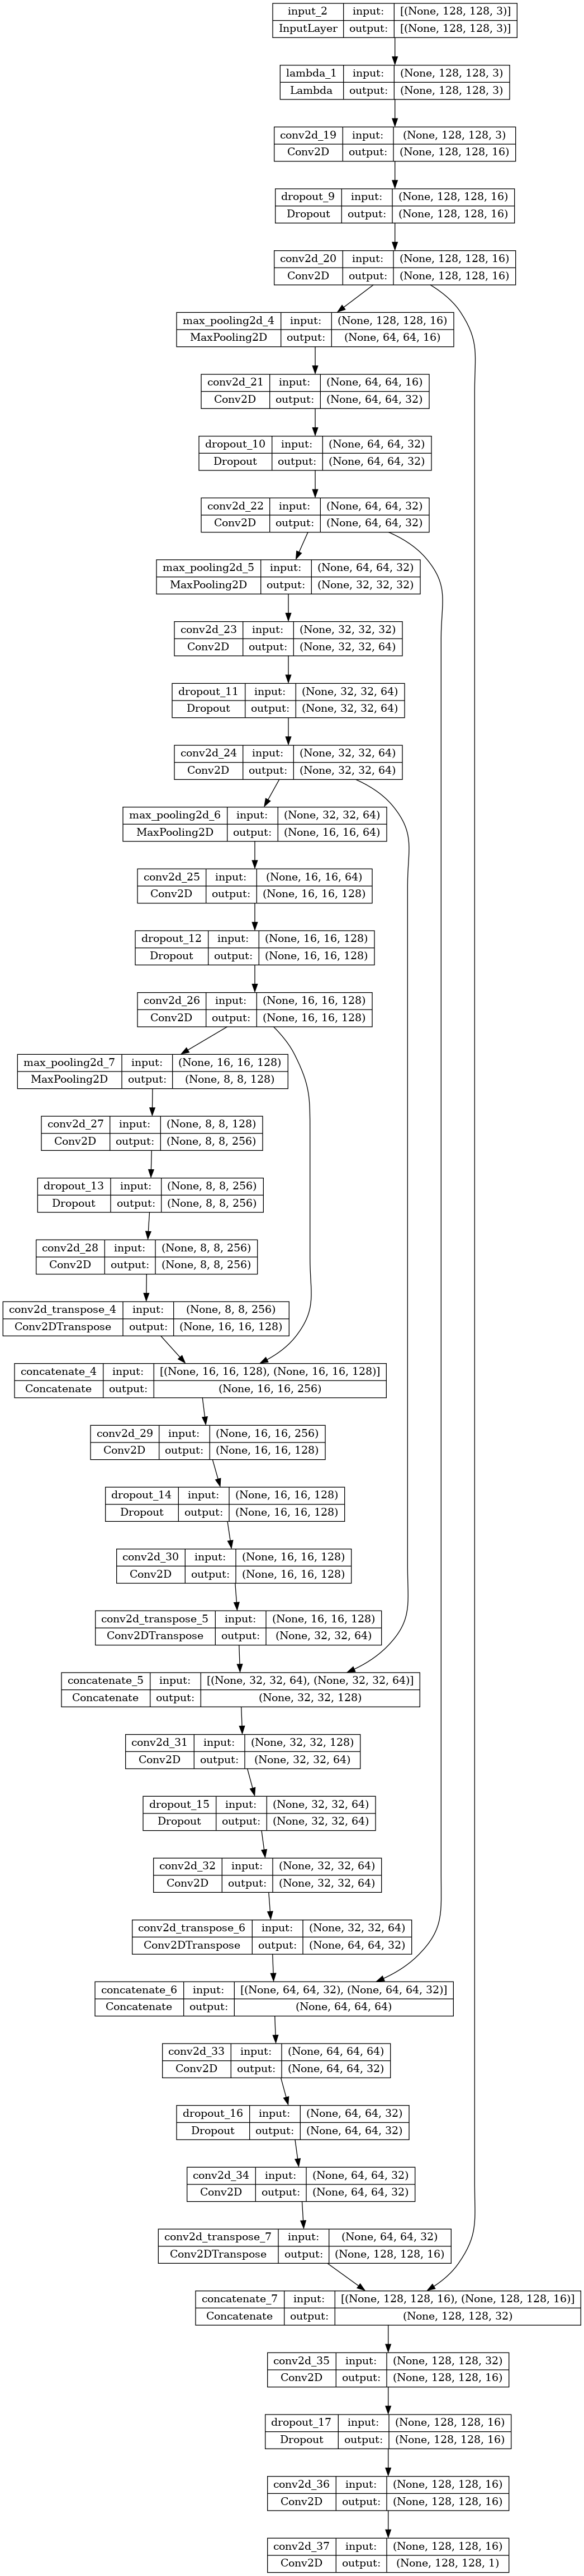

In [28]:
# Plot the model layers
tf.keras.utils.plot_model(breast_segm_model, show_shapes=True)

In [29]:
breast_segm_model.save('breast_segm_model.h5')
model_path = '/kaggle/working/breast_segm_model.h5'

In [30]:
# Initialize our callbacks
checkpoint = ModelCheckpoint(model_path,
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

# Fit our model 
results = breast_segm_model.fit(X_train, Y_train, validation_split=0.1,
                    batch_size=15, epochs=10,callbacks=[earlystop, checkpoint])

Epoch 1/10


2023-04-18 17:49:35.831695: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/dropout_9/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


35/35 [==============================] - ETA: 0s - loss: 0.3610 - accuracy: 0.8745
Epoch 1: val_loss improved from inf to 0.32988, saving model to /kaggle/working/breast_segm_model.h5
35/35 [==============================] - 9s 63ms/step - loss: 0.3610 - accuracy: 0.8745 - val_loss: 0.3299 - val_accuracy: 0.8610
Epoch 2/10
34/35 [============================>.] - ETA: 0s - loss: 0.2566 - accuracy: 0.9065
Epoch 2: val_loss improved from 0.32988 to 0.30279, saving model to /kaggle/working/breast_segm_model.h5
35/35 [==============================] - 1s 42ms/step - loss: 0.2564 - accuracy: 0.9066 - val_loss: 0.3028 - val_accuracy: 0.8720
Epoch 3/10
35/35 [==============================] - ETA: 0s - loss: 0.2514 - accuracy: 0.9086
Epoch 3: val_loss did not improve from 0.30279
35/35 [==============================] - 1s 30ms/step - loss: 0.2514 - accuracy: 0.9086 - val_loss: 0.3595 - val_accuracy: 0.8612
Epoch 4/10
35/35 [==============================] - ETA: 0s - loss: 0.2381 - accuracy:

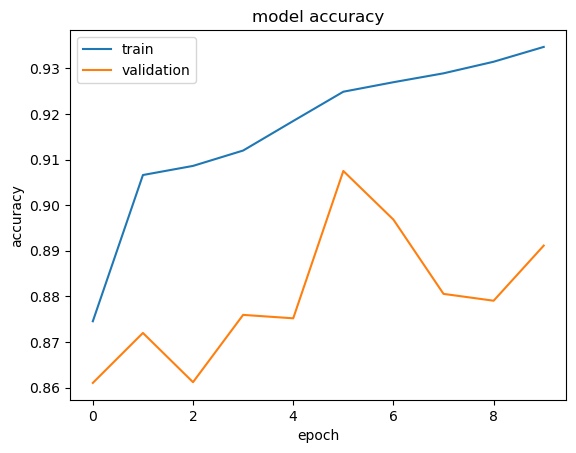

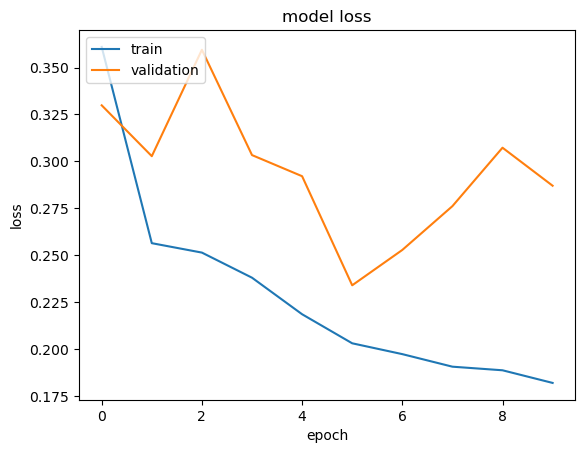

In [31]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [32]:
model = load_model('breast_segm_model.h5')

# the first 90% was used for training
preds_train = breast_segm_model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)


# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)

17/17 [==============================] - 1s 18ms/step


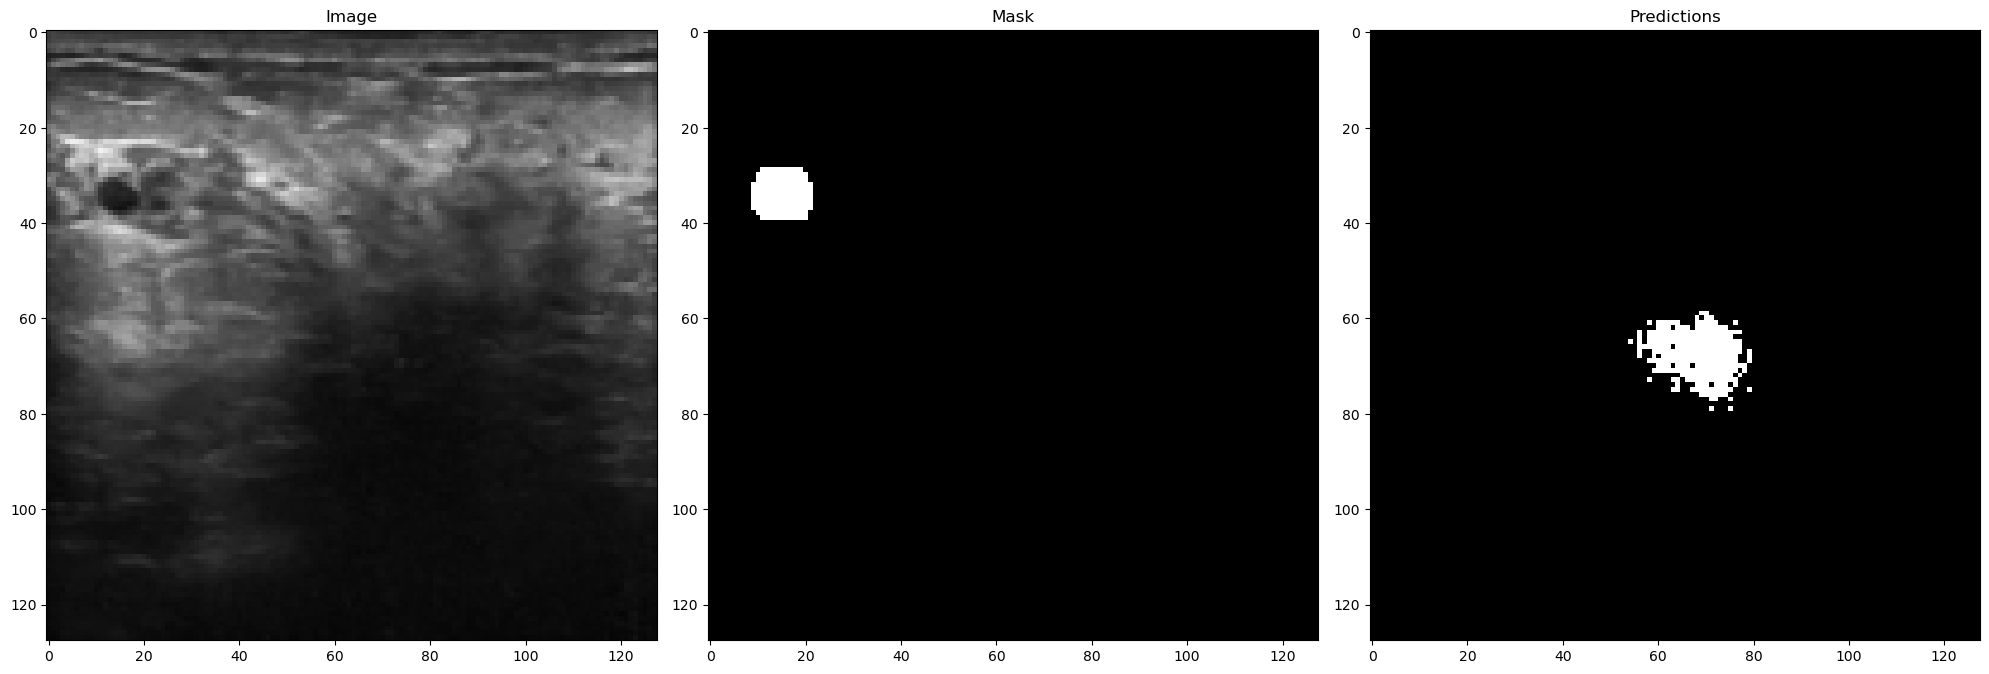

In [33]:
# Ploting our predicted masks
ix = random.randint(0, 120)
plt.figure(figsize=(20,20))

# Our original training image
plt.subplot(131)
imshow(X_train[ix])
plt.title("Image")

# Our original combined mask  
plt.subplot(132)
imshow(np.squeeze(Y_train[ix]))
plt.title("Mask")

# The mask our U-Net model predicts
plt.subplot(133)
imshow(np.squeeze(preds_train_t[ix] > 0.5))
plt.title("Predictions")
plt.show()

In [34]:
preds_test = breast_segm_model.predict(X_test, verbose=1)


# Threshold predictions
preds_test_t = (preds_test > 0.5).astype(np.uint8)

3/3 [==============================] - 0s 62ms/step


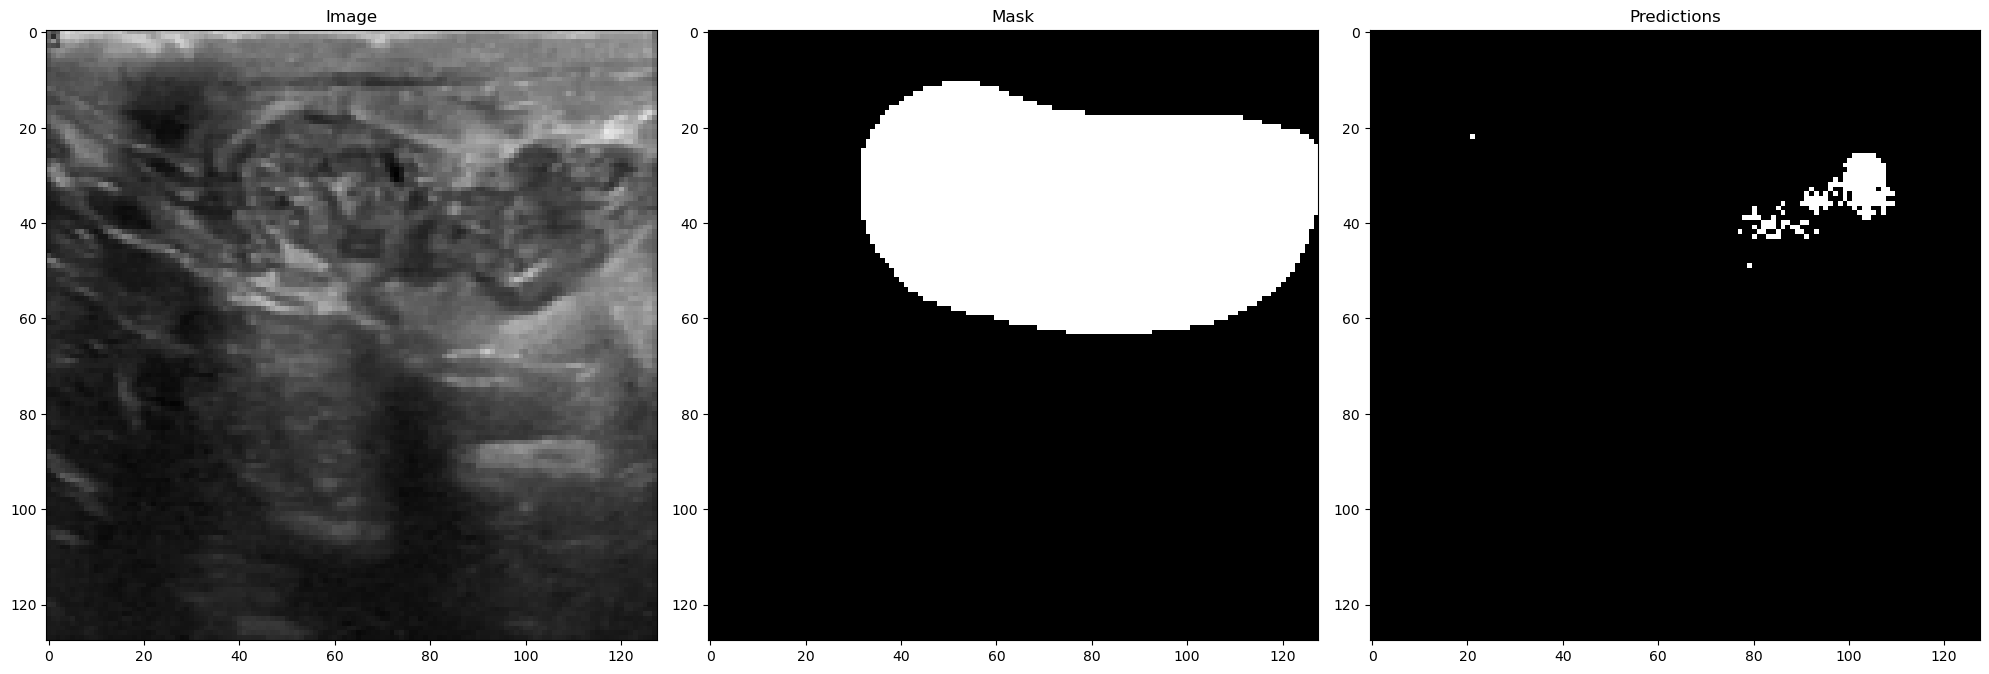

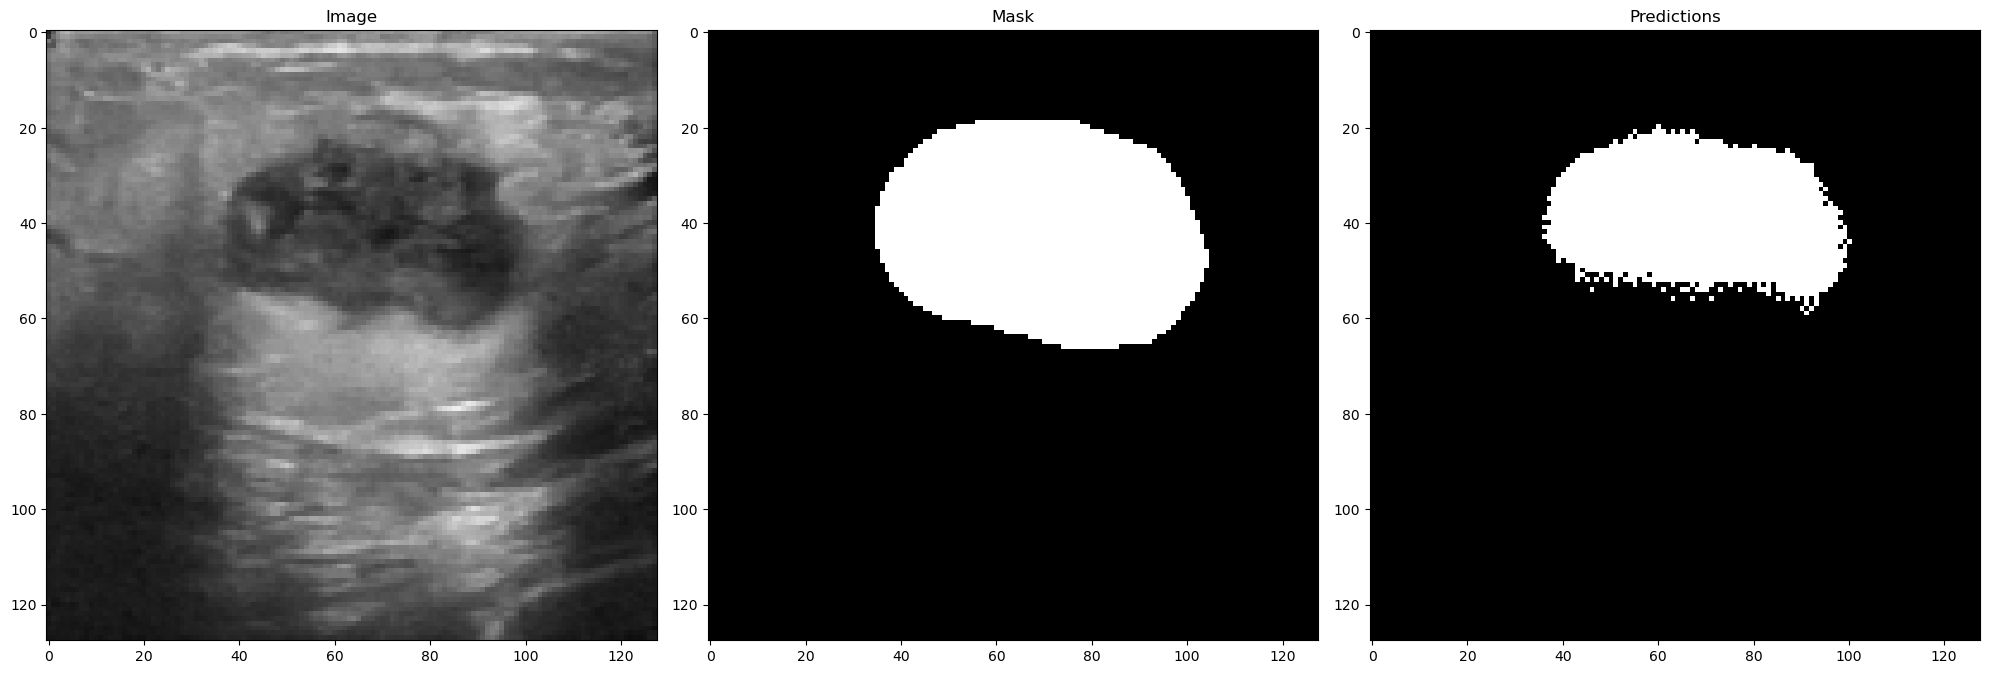

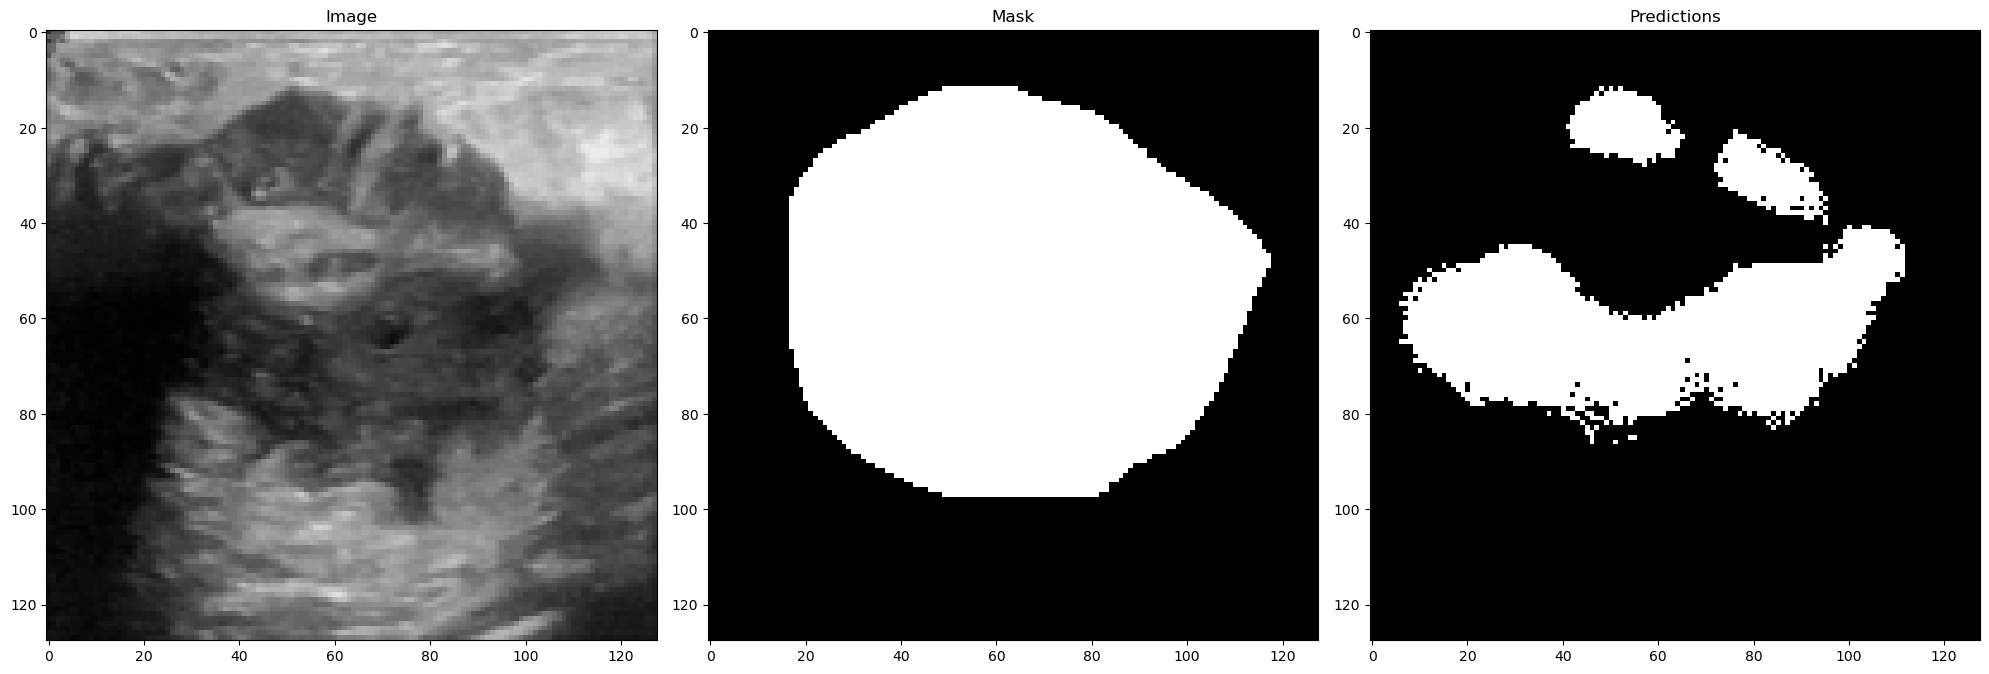

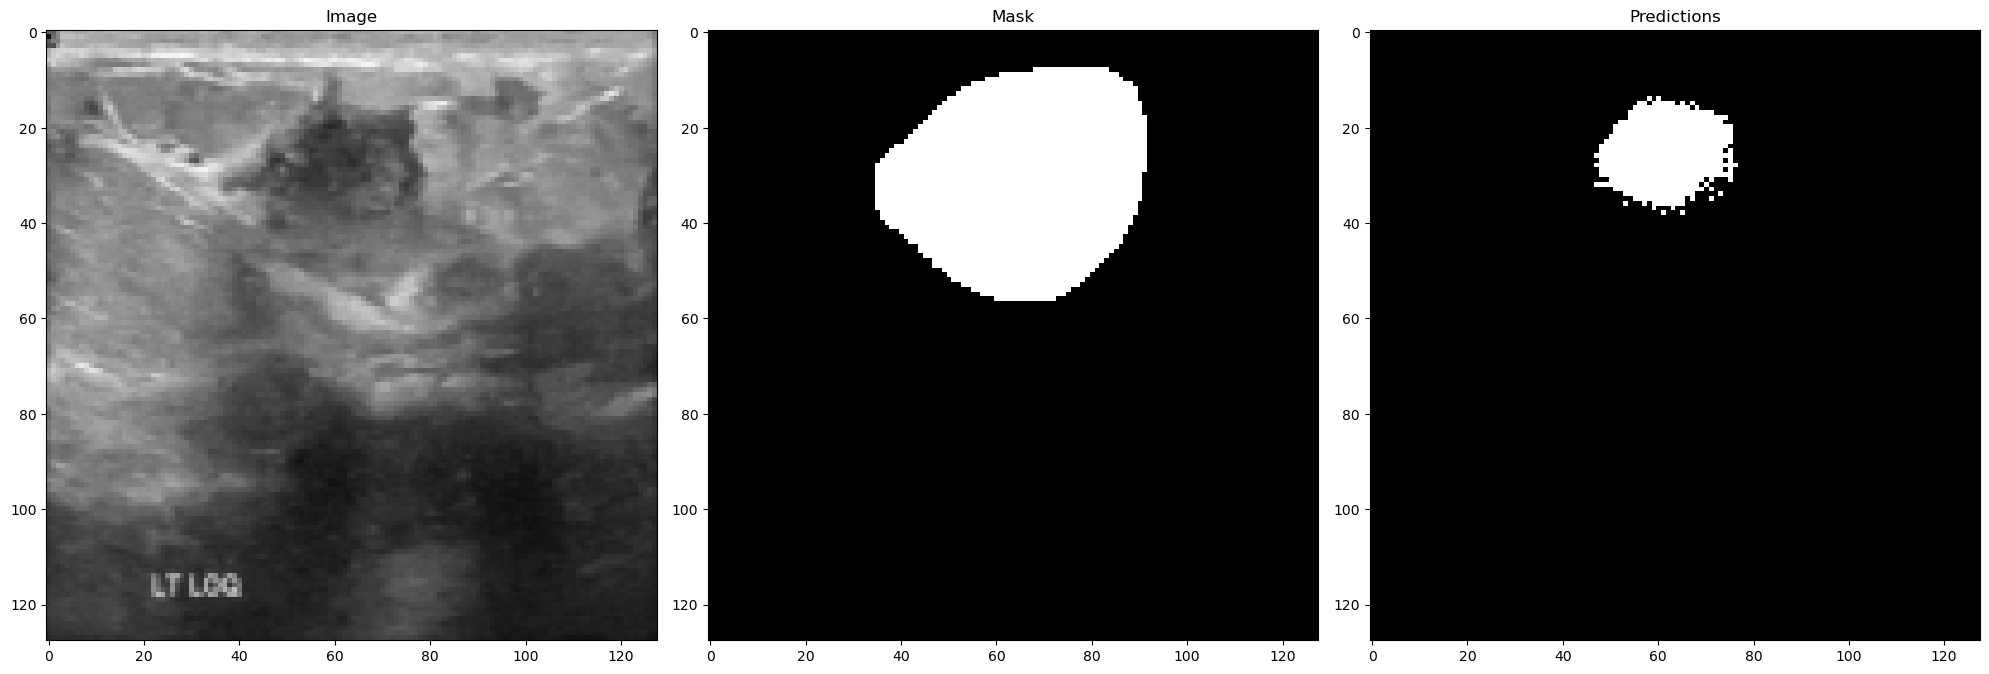

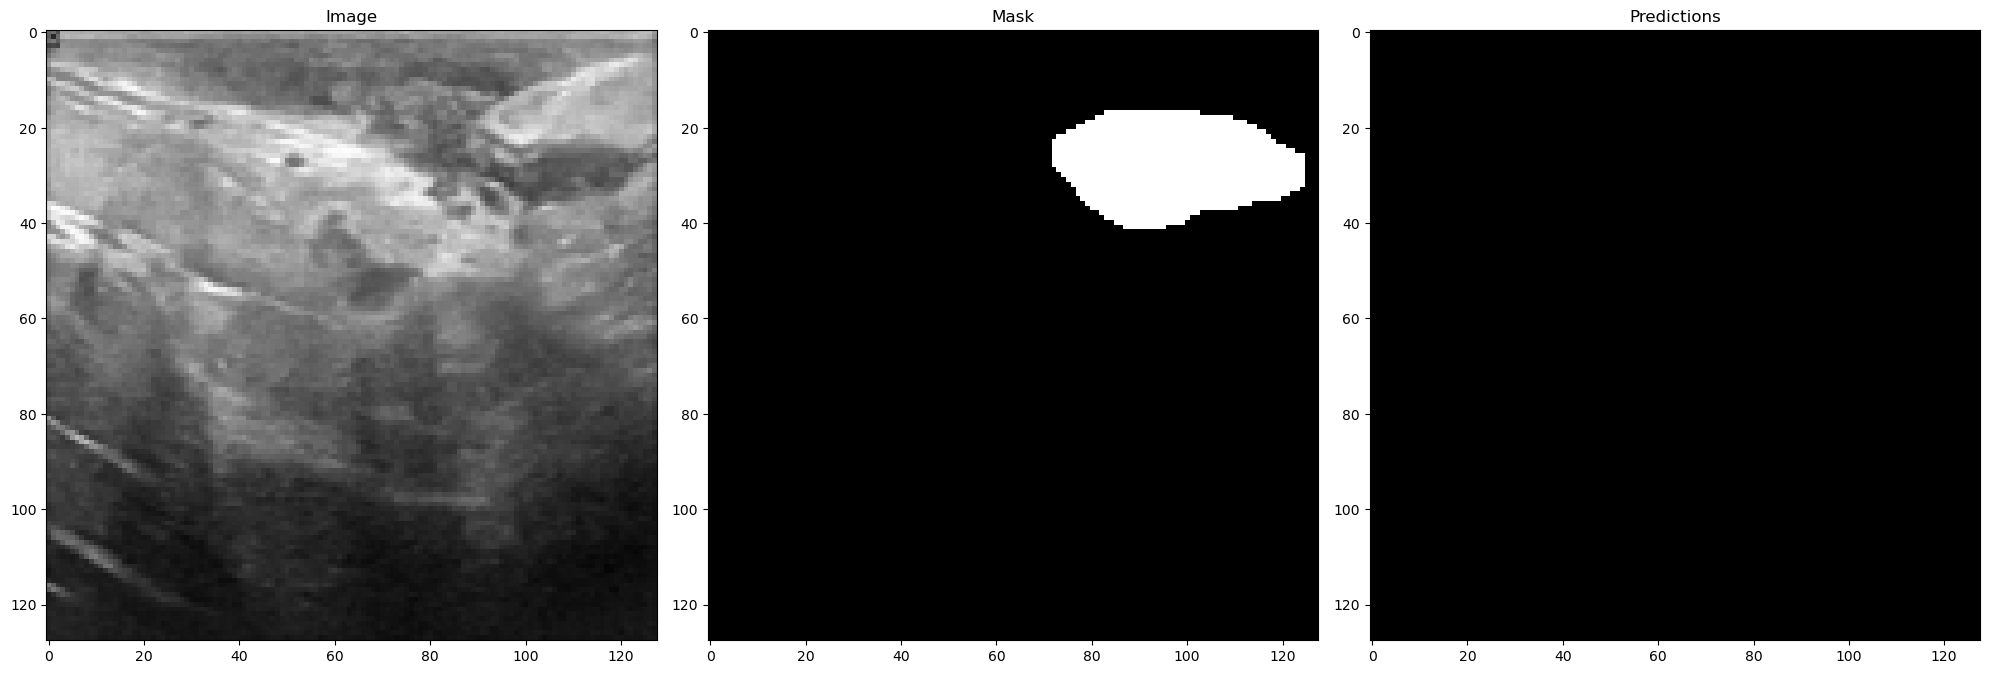

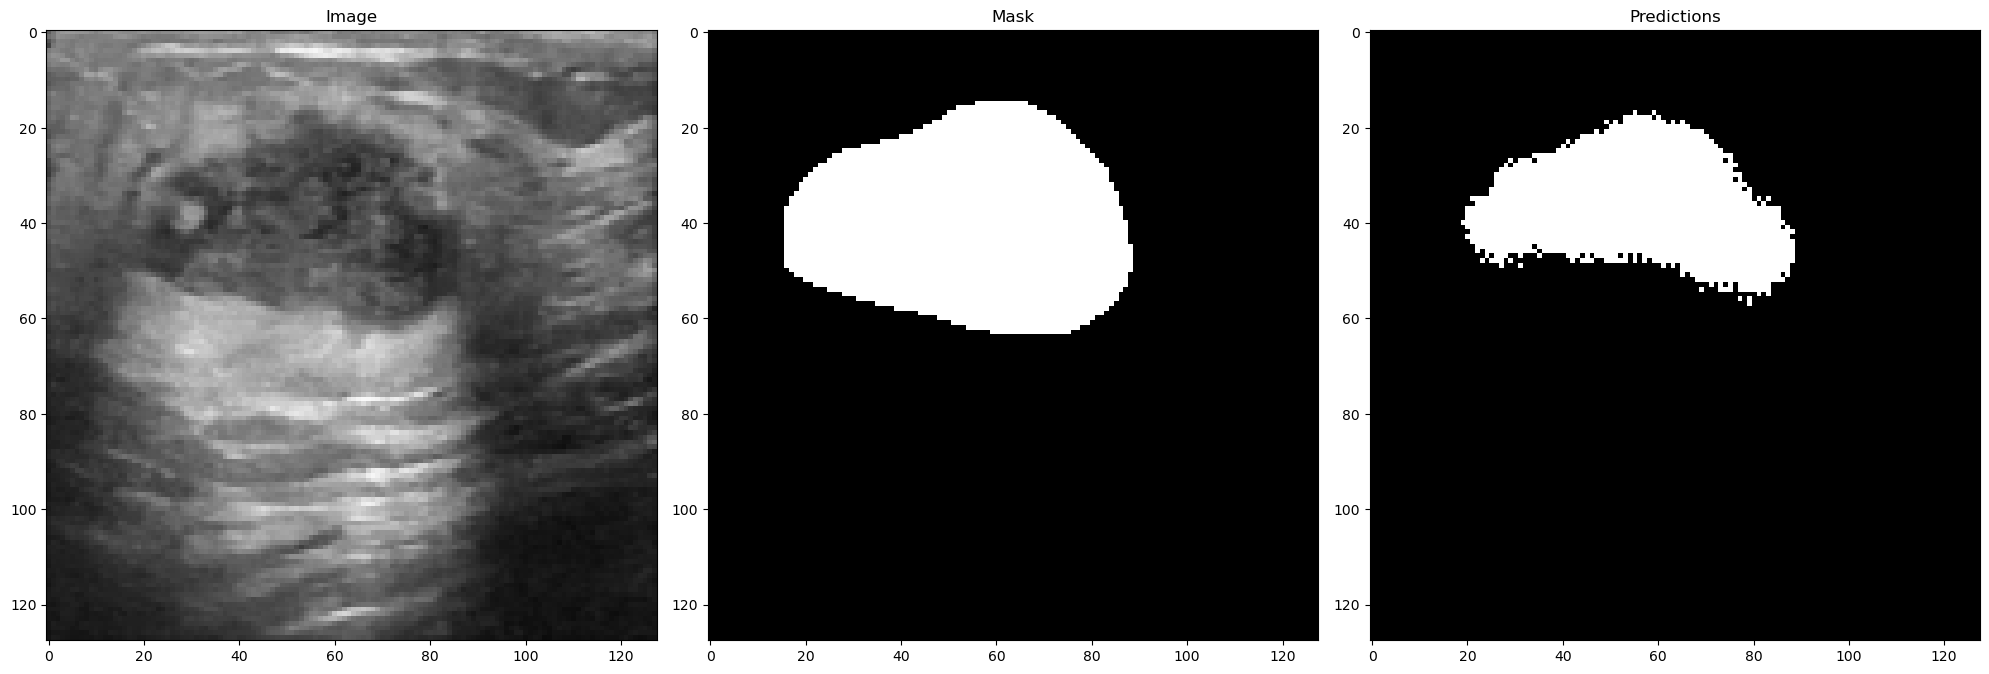

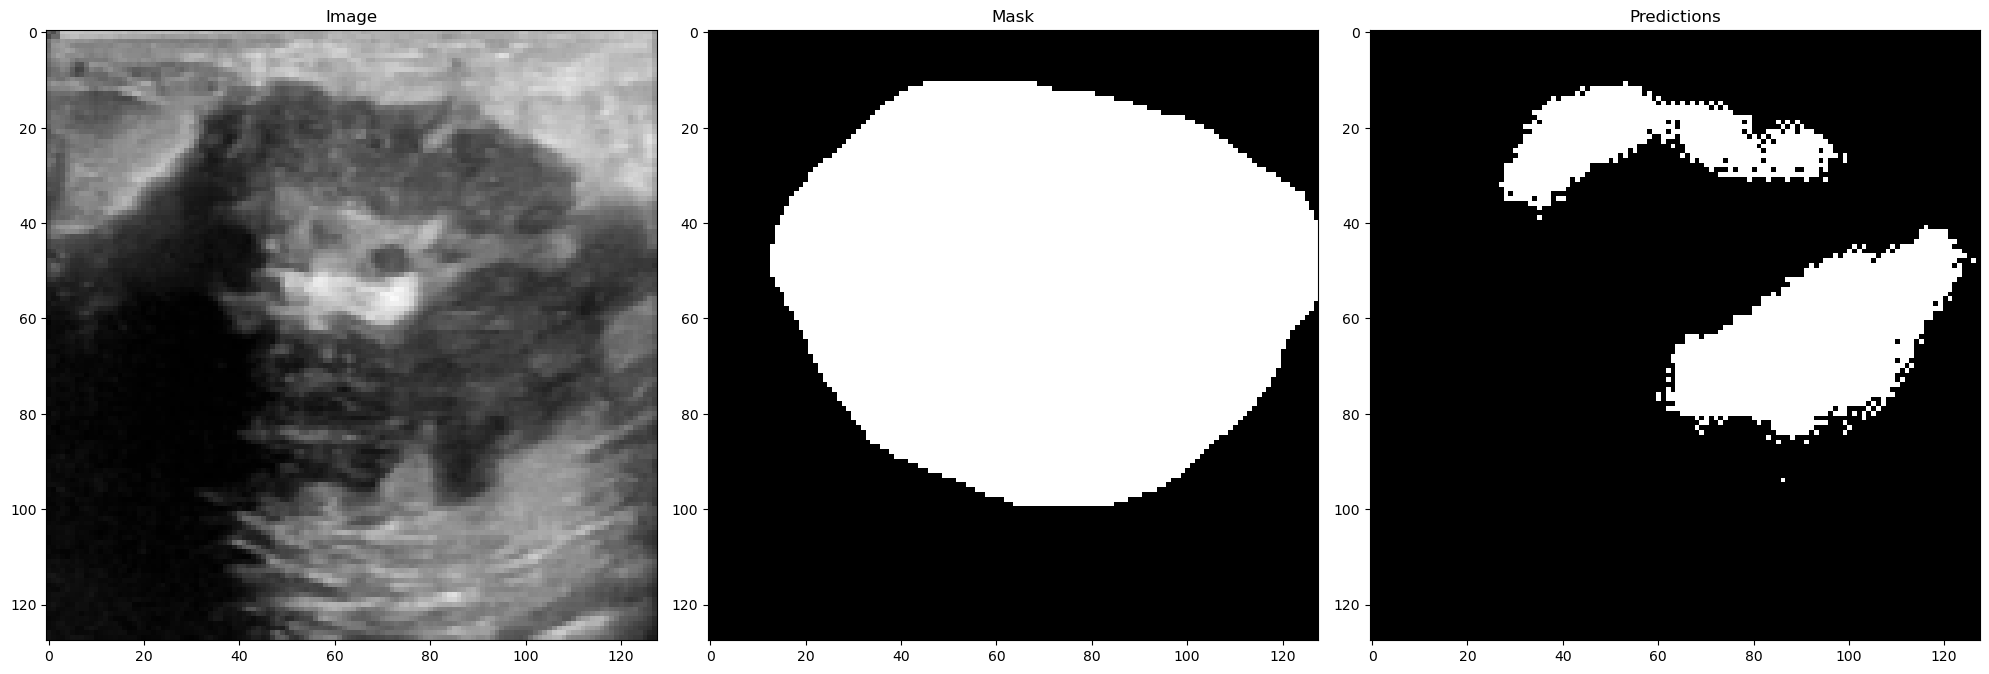

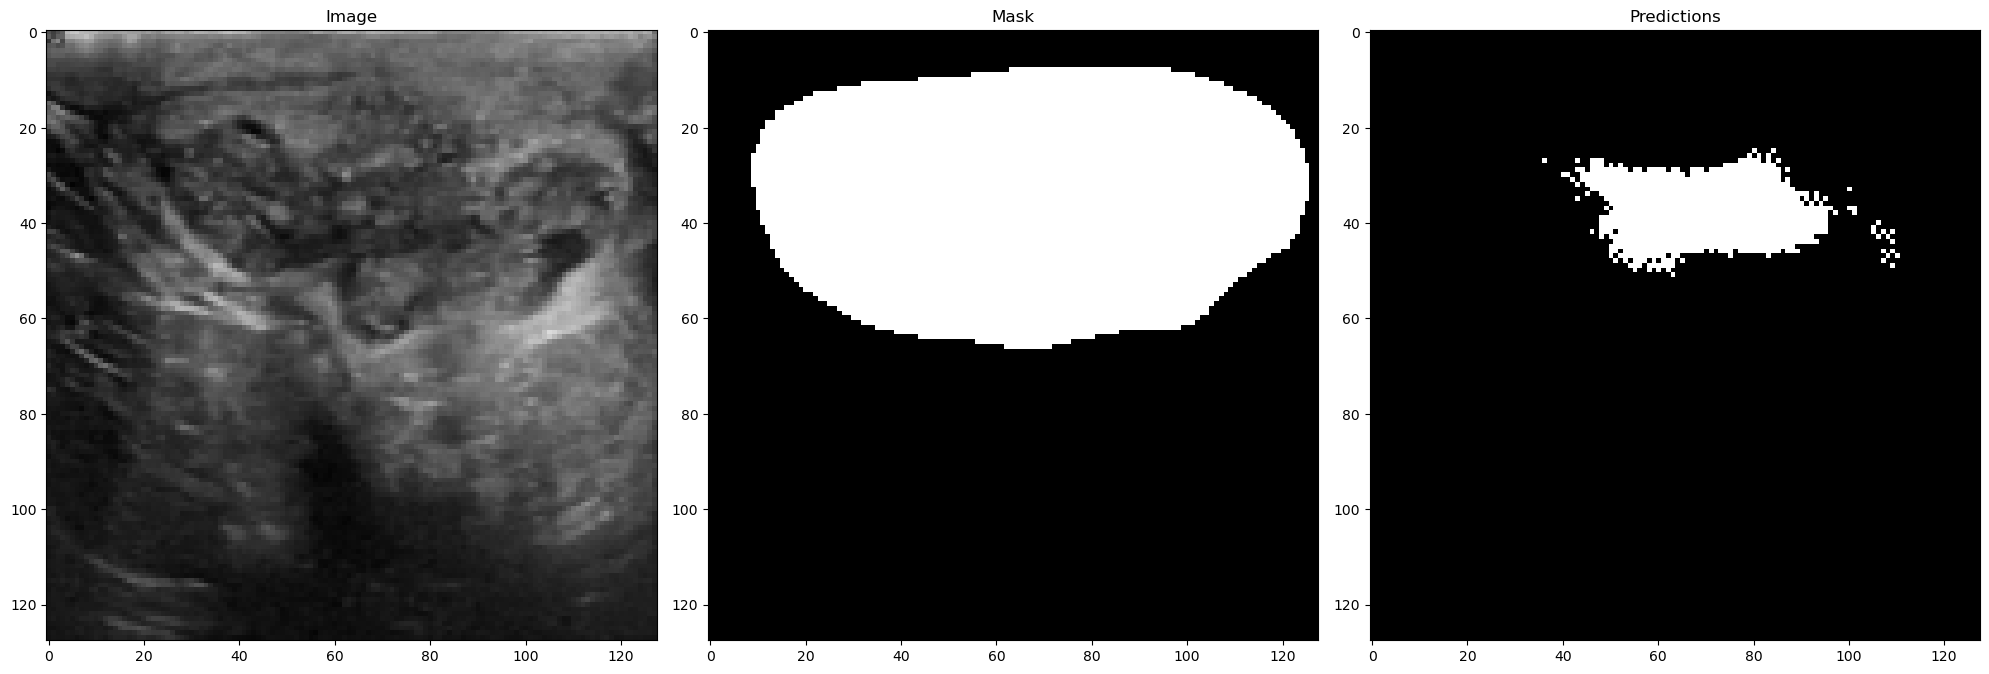

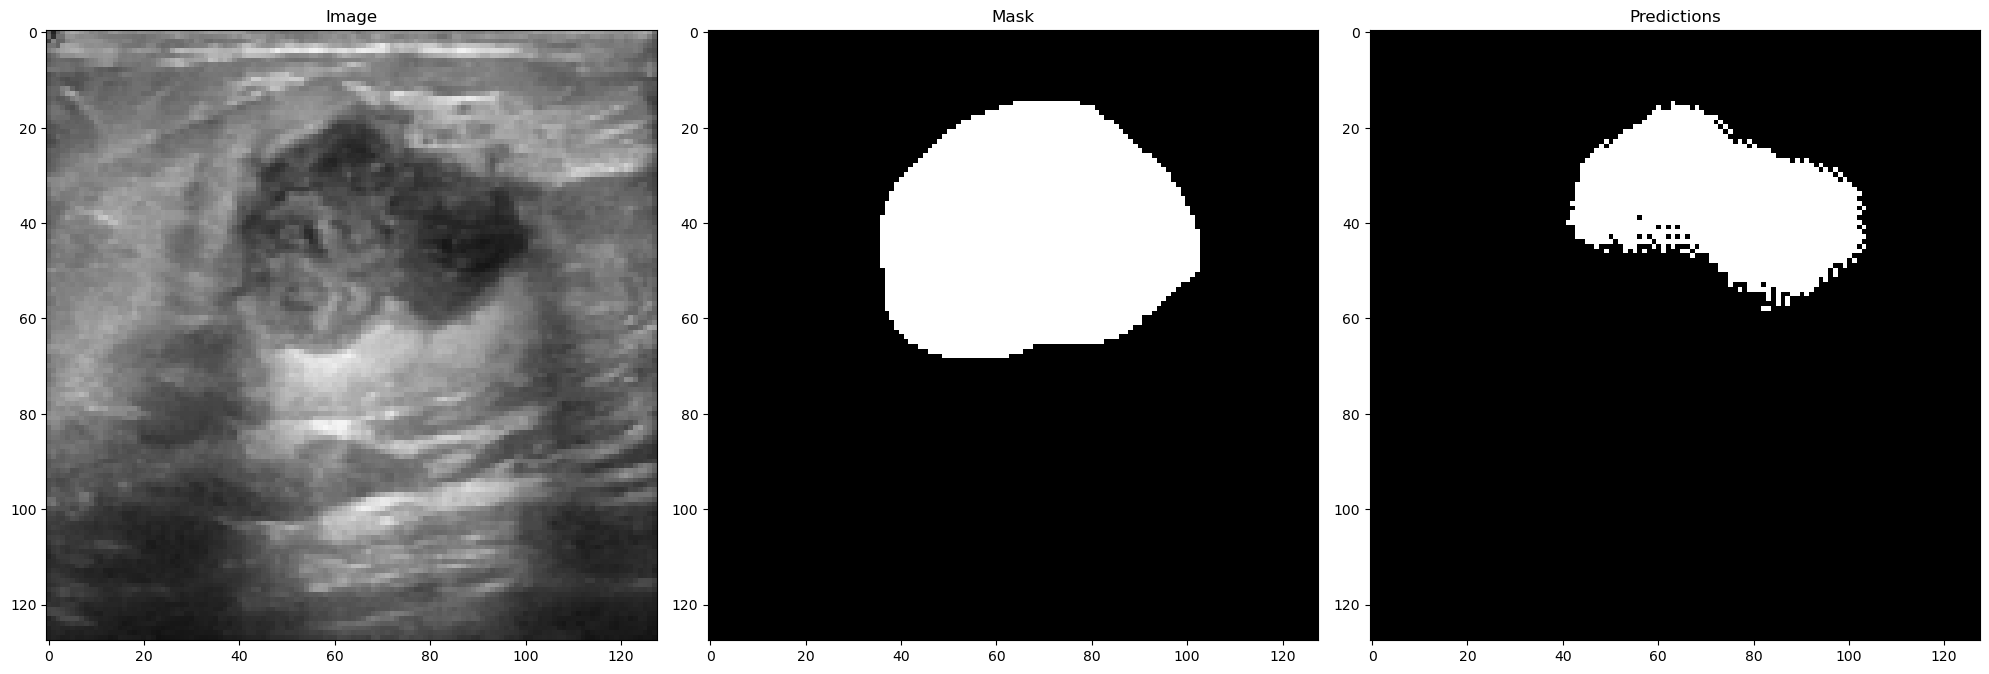

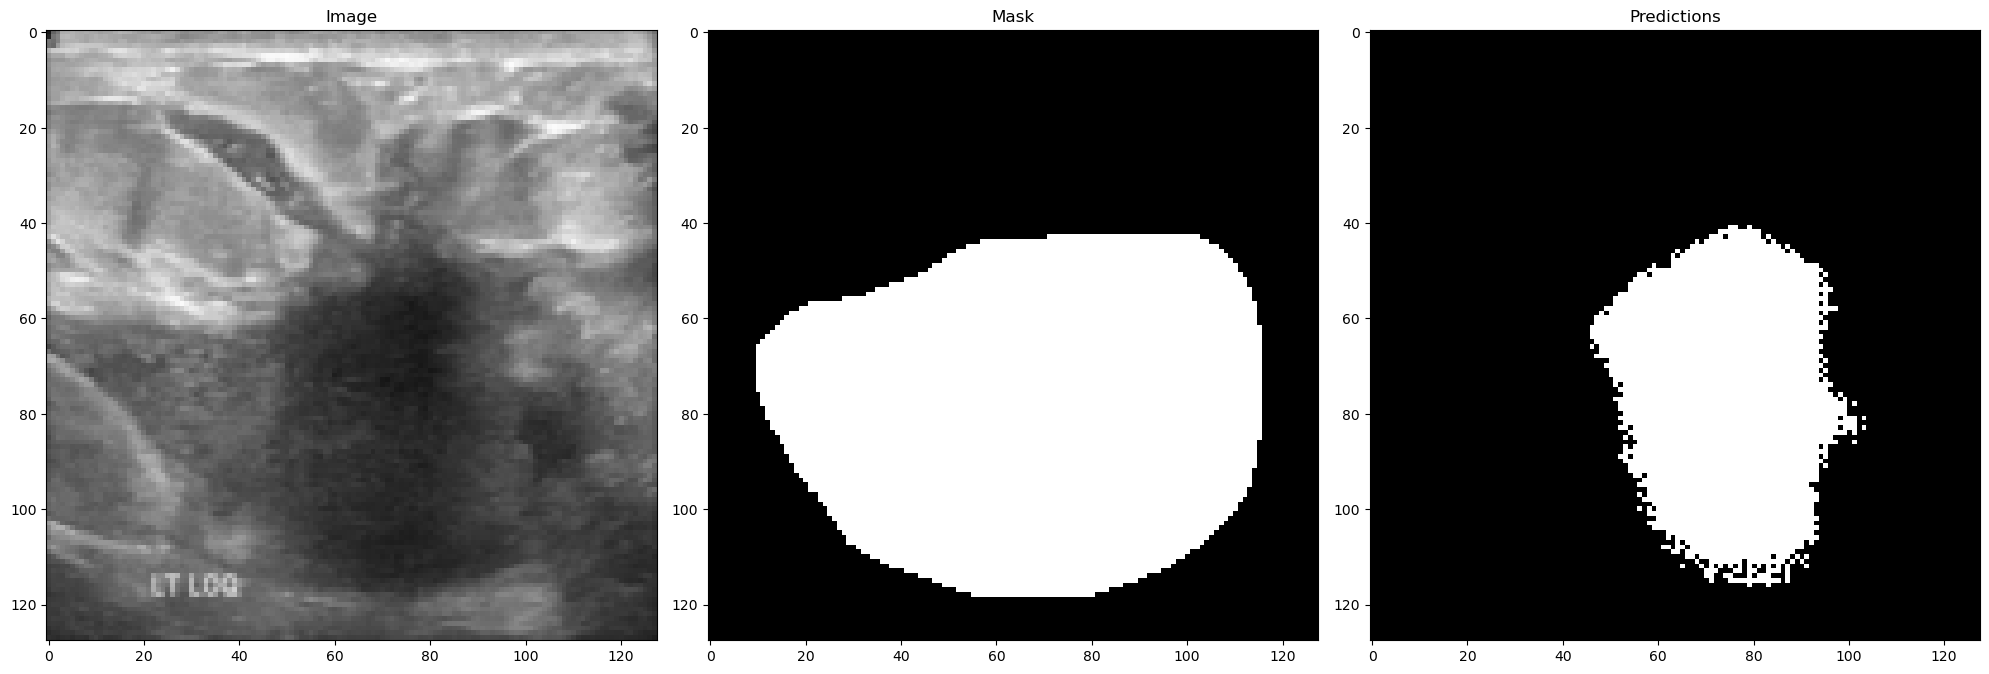

In [35]:
for i in range(10) :
    # Ploting our predicted masks
    plt.figure(figsize=(20,20))

    # Our original training image
    plt.subplot(131)
    imshow(X_test[i])
    plt.title("Image")

    # Our original combined mask  
    plt.subplot(132)
    imshow(np.squeeze(Y_test[i]))
    plt.title("Mask")

    # The mask our U-Net model predicts
    plt.subplot(133)
    imshow(np.squeeze(preds_test_t[i] > 0.5))
    plt.title("Predictions")
    plt.show()

In [36]:
def measure(mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    (x,y),(w,h),angle = cv2.minAreaRect(cnt)
    return w,h

In [ ]:
measure(preds_test_t[0])